In [1]:
hpath = "/home/xy/";
include(joinpath(hpath, "xylib.jl"));
include("MC.jl");

In [ ]:
city = "Basel"
fn = joinpath(hpath, "01mc/camsRad_Basel.nc")
fn_w = joinpath(hpath, "01mc/camsRad_Basel_w.nc"); # neib 2024

In [3]:
const N = 20;

In [45]:
city = "Berlin"
fn = joinpath(hpath, "01mc/01mc/irradiation2020_Berlin.nc");

In [13]:
ncinfo(fn_city)


##### NetCDF File #####

/home/xy/01mc/camsRad_Basel.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
altitude                                            1                         
latitude                                            1                         
time                                                733440                    
longitude                                           1                         

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
rely                            DOUBLE          longitude latitude altitude ti..
altitude                        DOUBLE          altitude                        
time                            INT             time                            
CLEAR_SKY_DHI

In [4]:
function getCmf(fn)
    cols = [:yr, :mo, :d, :hr, :mins, :ghi, :ghiCS]
    vars = ["ut_year", "ut_month", "ut_day", "ut_hour", "ut_minute", "GHI", "CLEAR_SKY_GHI"];

    yr = getNCvar(fn, vars[1])
    mo = getNCvar(fn, vars[2])
    d = getNCvar(fn, vars[3])
    hr = getNCvar(fn, vars[4])
    min = getNCvar(fn, vars[5])
    ghi = getNCvar(fn, vars[6])
    ghiCS = getNCvar(fn, vars[7])

    df = DataFrame(:yr=>yr, :mon=>mo, :day=>d, :hr=>hr, :min=>min, :ghi=>ghi, :ghiCS=>ghiCS)
    df_ = filter(:ghi => g -> (!iszero(g) & !isnan(g)), df)
    df_.cmf = df_.ghi ./ df_.ghiCS
    return df_
end

getCmf (generic function with 1 method)

In [5]:
df_b = getCmf(fn)

375911×8 DataFrame
    Row │ yr     mon   day   hr    min   ghi       ghiCS     cmf      
        │ Int16  Int8  Int8  Int8  Int8  Float64   Float64   Float64  
────────┼─────────────────────────────────────────────────────────────
      1 │  2004     2     1     7    15   1.35392   1.35392  1.0
      2 │  2004     2     1     7    30   6.74677   6.74677  1.0
      3 │  2004     2     1     7    45  14.2503   14.2503   1.0
      4 │  2004     2     1     8     0  22.7685   22.7685   1.0
      5 │  2004     2     1     8    15  31.7022   31.7022   1.0
      6 │  2004     2     1     8    30  40.6887   40.6887   1.0
      7 │  2004     2     1     8    45  49.495    49.495    1.0
      8 │  2004     2     1     9     0  57.9624   57.9624   1.0
      9 │  2004     2     1     9    15  65.9634   65.9634   1.0
     10 │  2004     2     1     9    30  73.4146   73.4146   1.0
     11 │  2004     2     1     9    45  80.2612   80.2612   1.0
   ⋮    │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮         ⋮         ⋮
 375902 │  2024    12    31    13    30  53.0683   62.9748   0.842691
 375903 │  2024    12    31    13    45  50.1113   56.9427   0.88003
 375904 │  2024    12    31    14     0  48.6099   50.3335   0.965755
 375905 │  2024    12    31    14    15  40.4794   43.2249   0.936483
 375906 │  2024    12    31    14    30  32.5591   35.7197   0.911515
 375907 │  2024    12    31    14    45  27.2007   27.9615   0.972791
 375908 │  2024    12    31    15     0  20.1632   20.1632   1.0
 375909 │  2024    12    31    15    15  12.6783   12.6783   1.0
 375910 │  2024    12    31    15    30   6.02951   6.02951  1.0
 375911 │  2024    12    31    15    45   1.17089   1.17089  1.0
                                                   375890 rows omitted

In [48]:
df_b_w = getCmf(fn_w)

17987×8 DataFrame
   Row │ yr     mon   day   hr    min   ghi        ghiCS      cmf      
       │ Int16  Int8  Int8  Int8  Int8  Float64    Float64    Float64  
───────┼───────────────────────────────────────────────────────────────
     1 │  2024     1     1     7    30   0.209801   0.243696  0.860911
     2 │  2024     1     1     7    45   3.47092    4.03168   0.860911
     3 │  2024     1     1     8     0   9.158     10.6376    0.860912
     4 │  2024     1     1     8    15  15.8497    18.2952    0.866332
     5 │  2024     1     1     8    30  25.1924    26.2723    0.958896
     6 │  2024     1     1     8    45  30.2281    34.1849    0.884251
     7 │  2024     1     1     9     0  33.1411    41.818     0.792508
     8 │  2024     1     1     9    15  35.6772    48.9076    0.729481
     9 │  2024     1     1     9    30  41.0334    55.3568    0.741253
    10 │  2024     1     1     9    45  47.0407    61.2267    0.768304
    11 │  2024     1     1    10     0  47.6103    66.4639    0.716334
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮          ⋮         ⋮
 17978 │  2024    12    31    13    30  58.4267    63.0822    0.926199
 17979 │  2024    12    31    13    45  52.6939    57.0686    0.923343
 17980 │  2024    12    31    14     0  47.8691    50.476     0.948354
 17981 │  2024    12    31    14    15  42.7858    43.382     0.986257
 17982 │  2024    12    31    14    30  35.8896    35.8896    1.0
 17983 │  2024    12    31    14    45  28.1424    28.1424    1.0
 17984 │  2024    12    31    15     0  20.3522    20.3522    1.0
 17985 │  2024    12    31    15    15  12.8698    12.8698    1.0
 17986 │  2024    12    31    15    30   6.20641    6.20641   1.0
 17987 │  2024    12    31    15    45   1.27562    1.27562   1.0
                                                     17966 rows omitted

### diurnal

In [7]:
df = filter([:yr, :mon, :day]=>(y,m,d) -> (y==2024 && m==12 && d==1), df_b) #1≤d≤3
transform!(df, [:hr,:min] => ByRow((h,mi) -> Time(h,mi)) => :dt)

35×9 DataFrame
 Row │ yr     mon   day   hr    min   ghi        ghiCS      cmf       dt       
     │ Int16  Int8  Int8  Int8  Int8  Float64    Float64    Float64   Time     
─────┼─────────────────────────────────────────────────────────────────────────
   1 │  2024    12     1     7    15   1.23353    1.23353   1.0       07:15:00
   2 │  2024    12     1     7    30   6.50257    6.50257   1.0       07:30:00
   3 │  2024    12     1     7    45  13.5706    13.5706    1.0       07:45:00
   4 │  2024    12     1     8     0  21.3372    21.3889    0.997582  08:00:00
   5 │  2024    12     1     8    15  27.985     29.4227    0.951135  08:15:00
   6 │  2024    12     1     8    30  33.8102    37.3659    0.904843  08:30:00
   7 │  2024    12     1     8    45  43.6971    45.0276    0.970452  08:45:00
   8 │  2024    12     1     9     0  52.033     52.2779    0.995315  09:00:00
   9 │  2024    12     1     9    15  53.2111    59.0887    0.900528  09:15:00
  10 │  2024    12     1     9    30  55.0172    65.3818    0.841476  09:30:00
  11 │  2024    12     1     9    45  59.0599    71.0261    0.831524  09:45:00
  ⋮  │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮          ⋮         ⋮         ⋮
  26 │  2024    12     1    13    30  52.9597    62.1173    0.852576  13:30:00
  27 │  2024    12     1    13    45  53.291     55.5459    0.959406  13:45:00
  28 │  2024    12     1    14     0  48.4473    48.4473    1.0       14:00:00
  29 │  2024    12     1    14    15  40.9064    40.9064    1.0       14:15:00
  30 │  2024    12     1    14    30  33.0351    33.0351    1.0       14:30:00
  31 │  2024    12     1    14    45  24.9933    24.9933    1.0       14:45:00
  32 │  2024    12     1    15     0  17.0287    17.0287    1.0       15:00:00
  33 │  2024    12     1    15    15   9.5557     9.5557    1.0       15:15:00
  34 │  2024    12     1    15    30   3.34053    3.34053   1.0       15:30:00
  35 │  2024    12     1    15    45   0.130614   0.130614  1.0       15:45:00
                                                                14 rows omitted

In [50]:
df = filter([:mon, :day]=>(m,d) -> (m==10 && d==1), df_b) #1≤d≤3
transform!(df, [:hr,:min] => ByRow((h,mi) -> Time(h,mi)) => :dt)

46×9 DataFrame
 Row │ yr     mon   day   hr    min   ghi         ghiCS       cmf       dt       
     │ Int16  Int8  Int8  Int8  Int8  Float64     Float64     Float64   Time     
─────┼───────────────────────────────────────────────────────────────────────────
   1 │  2020    10     1     5    30   1.12972      2.16567   0.521651  05:30:00
   2 │  2020    10     1     5    45   6.2401       7.60027   0.821036  05:45:00
   3 │  2020    10     1     6     0   8.90258     14.8212    0.600667  06:00:00
   4 │  2020    10     1     6    15  10.6574      23.0843    0.461673  06:15:00
   5 │  2020    10     1     6    30   9.14635     31.9031    0.286692  06:30:00
   6 │  2020    10     1     6    45  12.2728      40.9864    0.299435  06:45:00
   7 │  2020    10     1     7     0  18.6276      50.122     0.371645  07:00:00
   8 │  2020    10     1     7    15  25.4778      59.1569    0.430682  07:15:00
   9 │  2020    10     1     7    30  30.6512      67.9757    0.450915  07:30:00
  10 │  2020    10     1     7    45  32.8146      76.4867    0.429024  07:45:00
  11 │  2020    10     1     8     0  34.1138      84.6149    0.403165  08:00:00
  ⋮  │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮           ⋮          ⋮         ⋮
  37 │  2020    10     1    14    30  52.758       69.1243    0.763233  14:30:00
  38 │  2020    10     1    14    45  45.8816      60.1671    0.762569  14:45:00
  39 │  2020    10     1    15     0  38.4501      51.0263    0.753534  15:00:00
  40 │  2020    10     1    15    15  31.4141      41.908     0.749596  15:15:00
  41 │  2020    10     1    15    30  24.7321      32.9624    0.750314  15:30:00
  42 │  2020    10     1    15    45  18.9936      24.3242    0.780852  15:45:00
  43 │  2020    10     1    16     0  13.0209      16.2891    0.799362  16:00:00
  44 │  2020    10     1    16    15   7.54192      9.24625   0.815674  16:15:00
  45 │  2020    10     1    16    30   2.44756      3.67306   0.666356  16:30:00
  46 │  2020    10     1    16    45   0.0695866    0.345797  0.201235  16:45:00
                                                                  25 rows omitted

In [8]:
time_formatter(dt) = Dates.format(dt, "HH:MM")

time_formatter (generic function with 1 method)

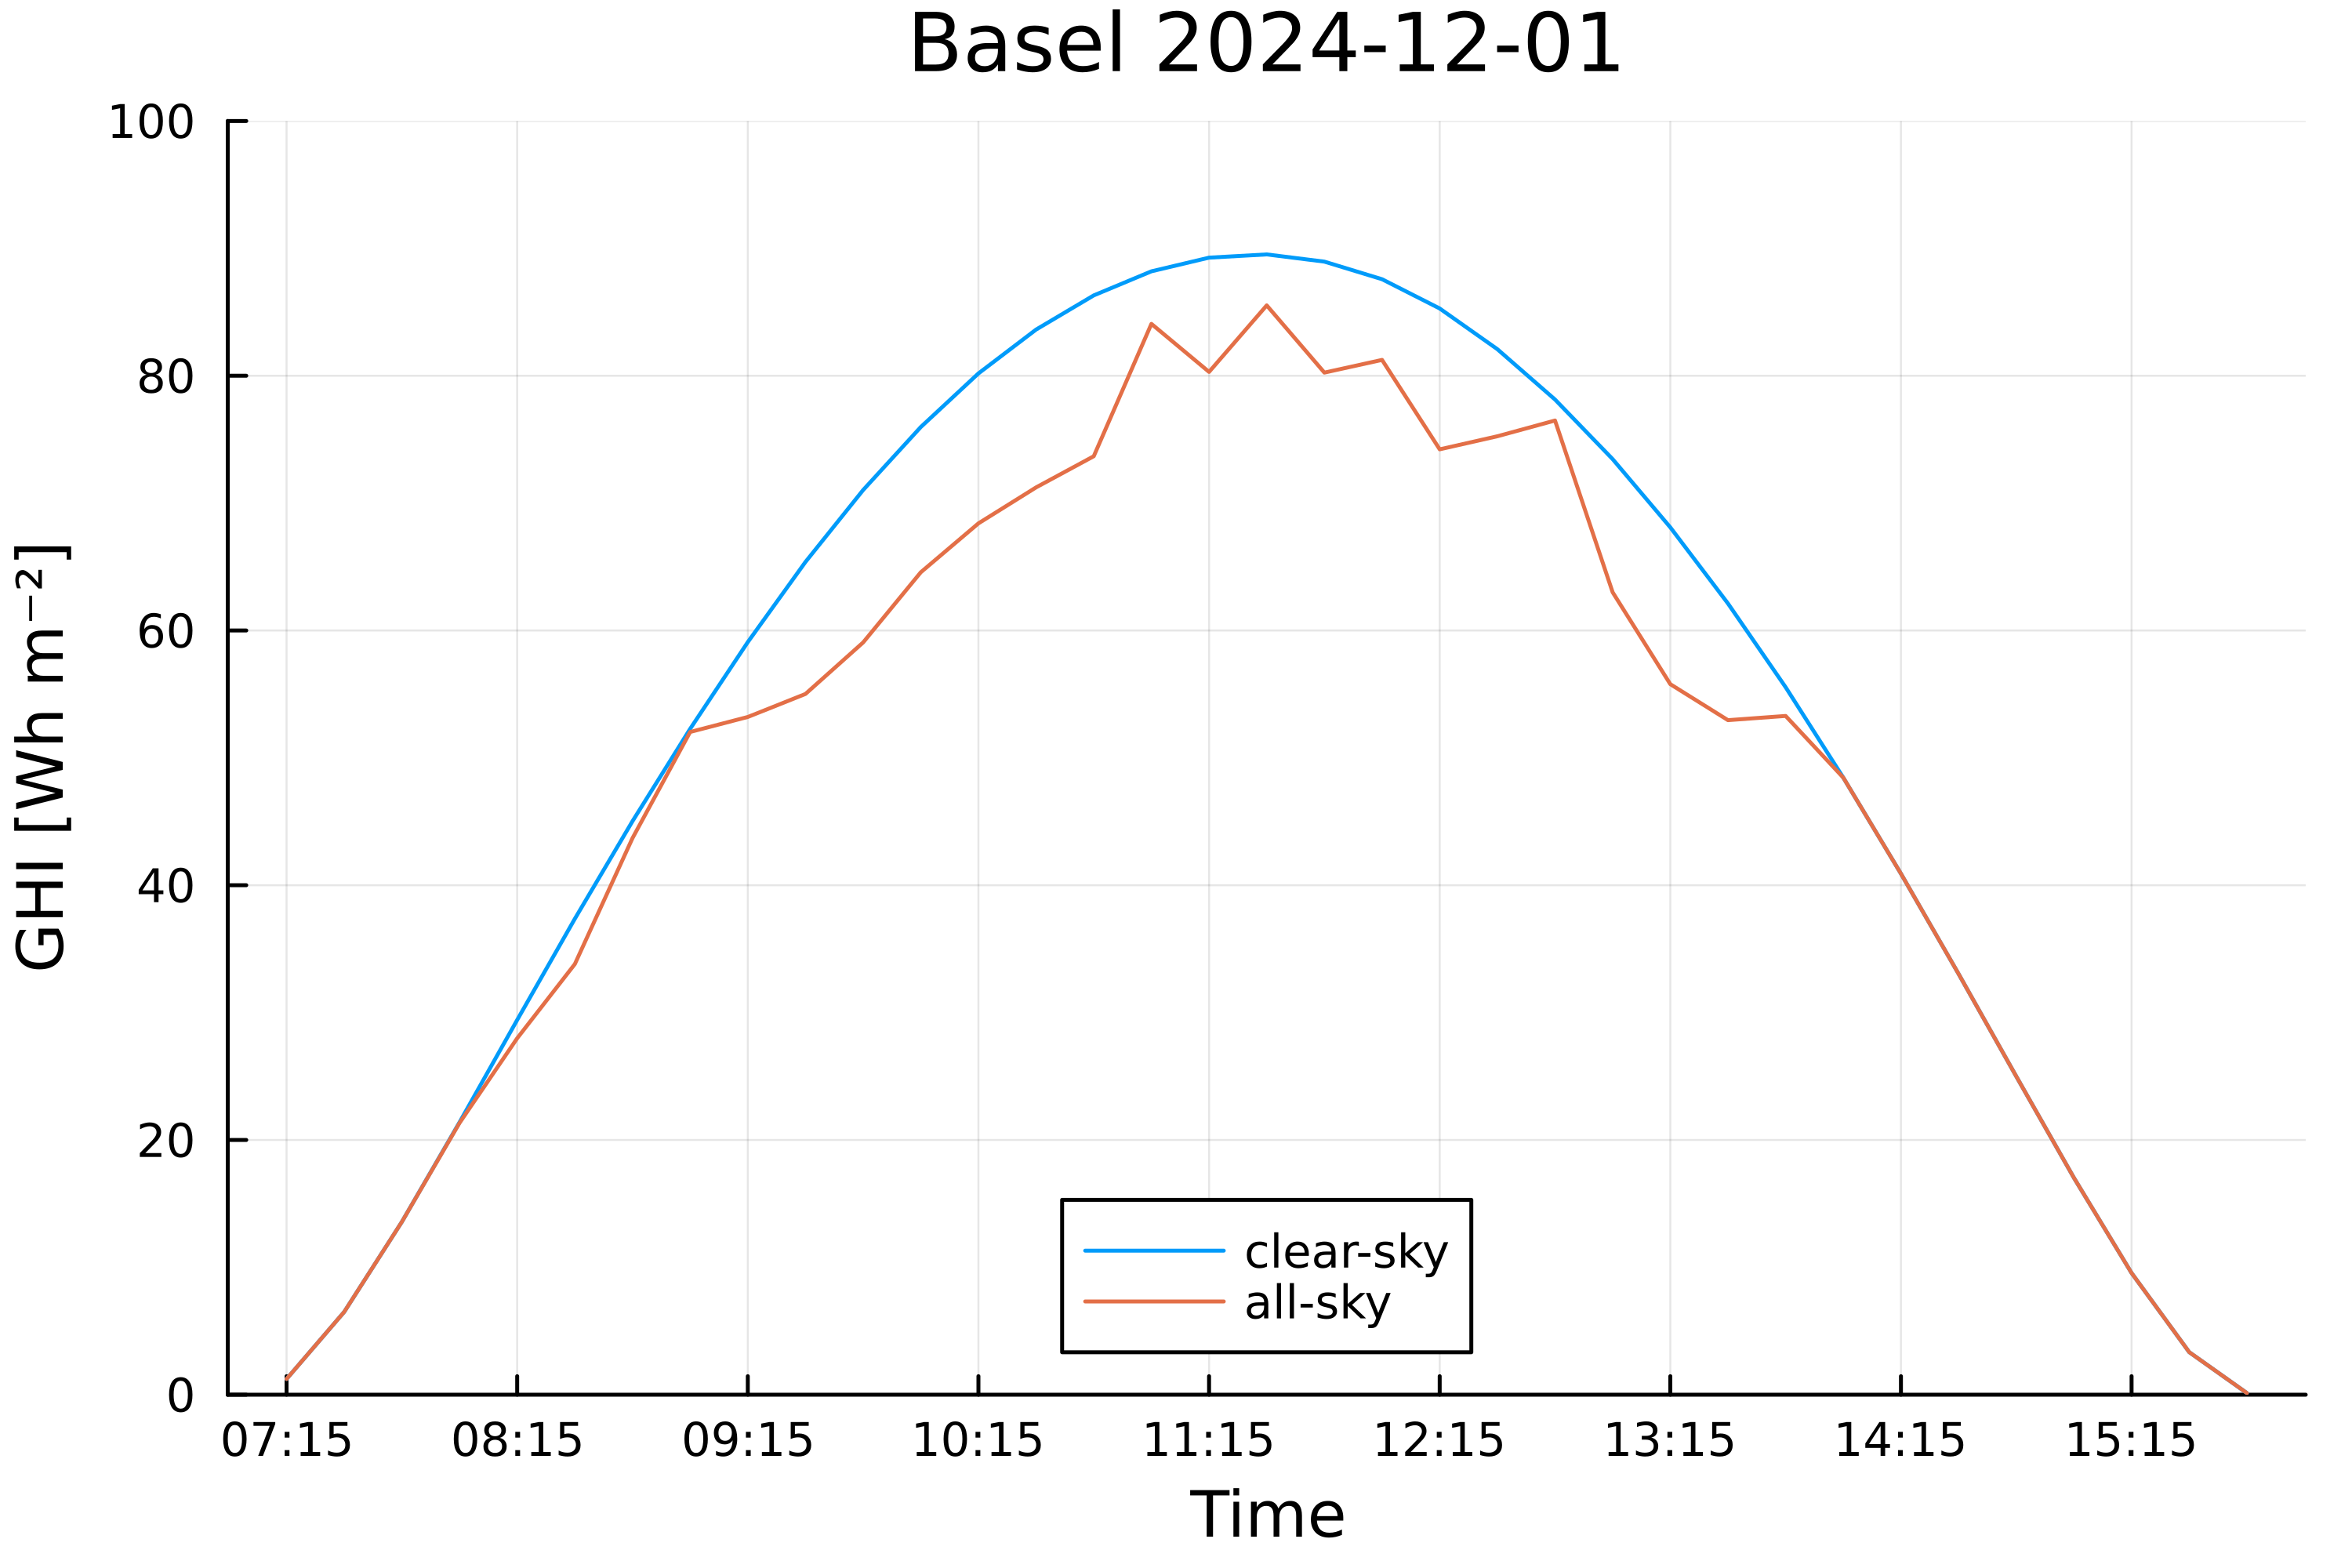

In [10]:
plot(df.dt, [df.ghiCS df.ghi], lab=["clear-sky" "all-sky"], leg=:bottom,
    xticks=(df.dt[1:4:end], time_formatter.(df.dt[1:4:end])),
    ylim=(0,100), xlabel="Time", ylabel="GHI [Wh m⁻²]", title=city*" 2024-12-01")

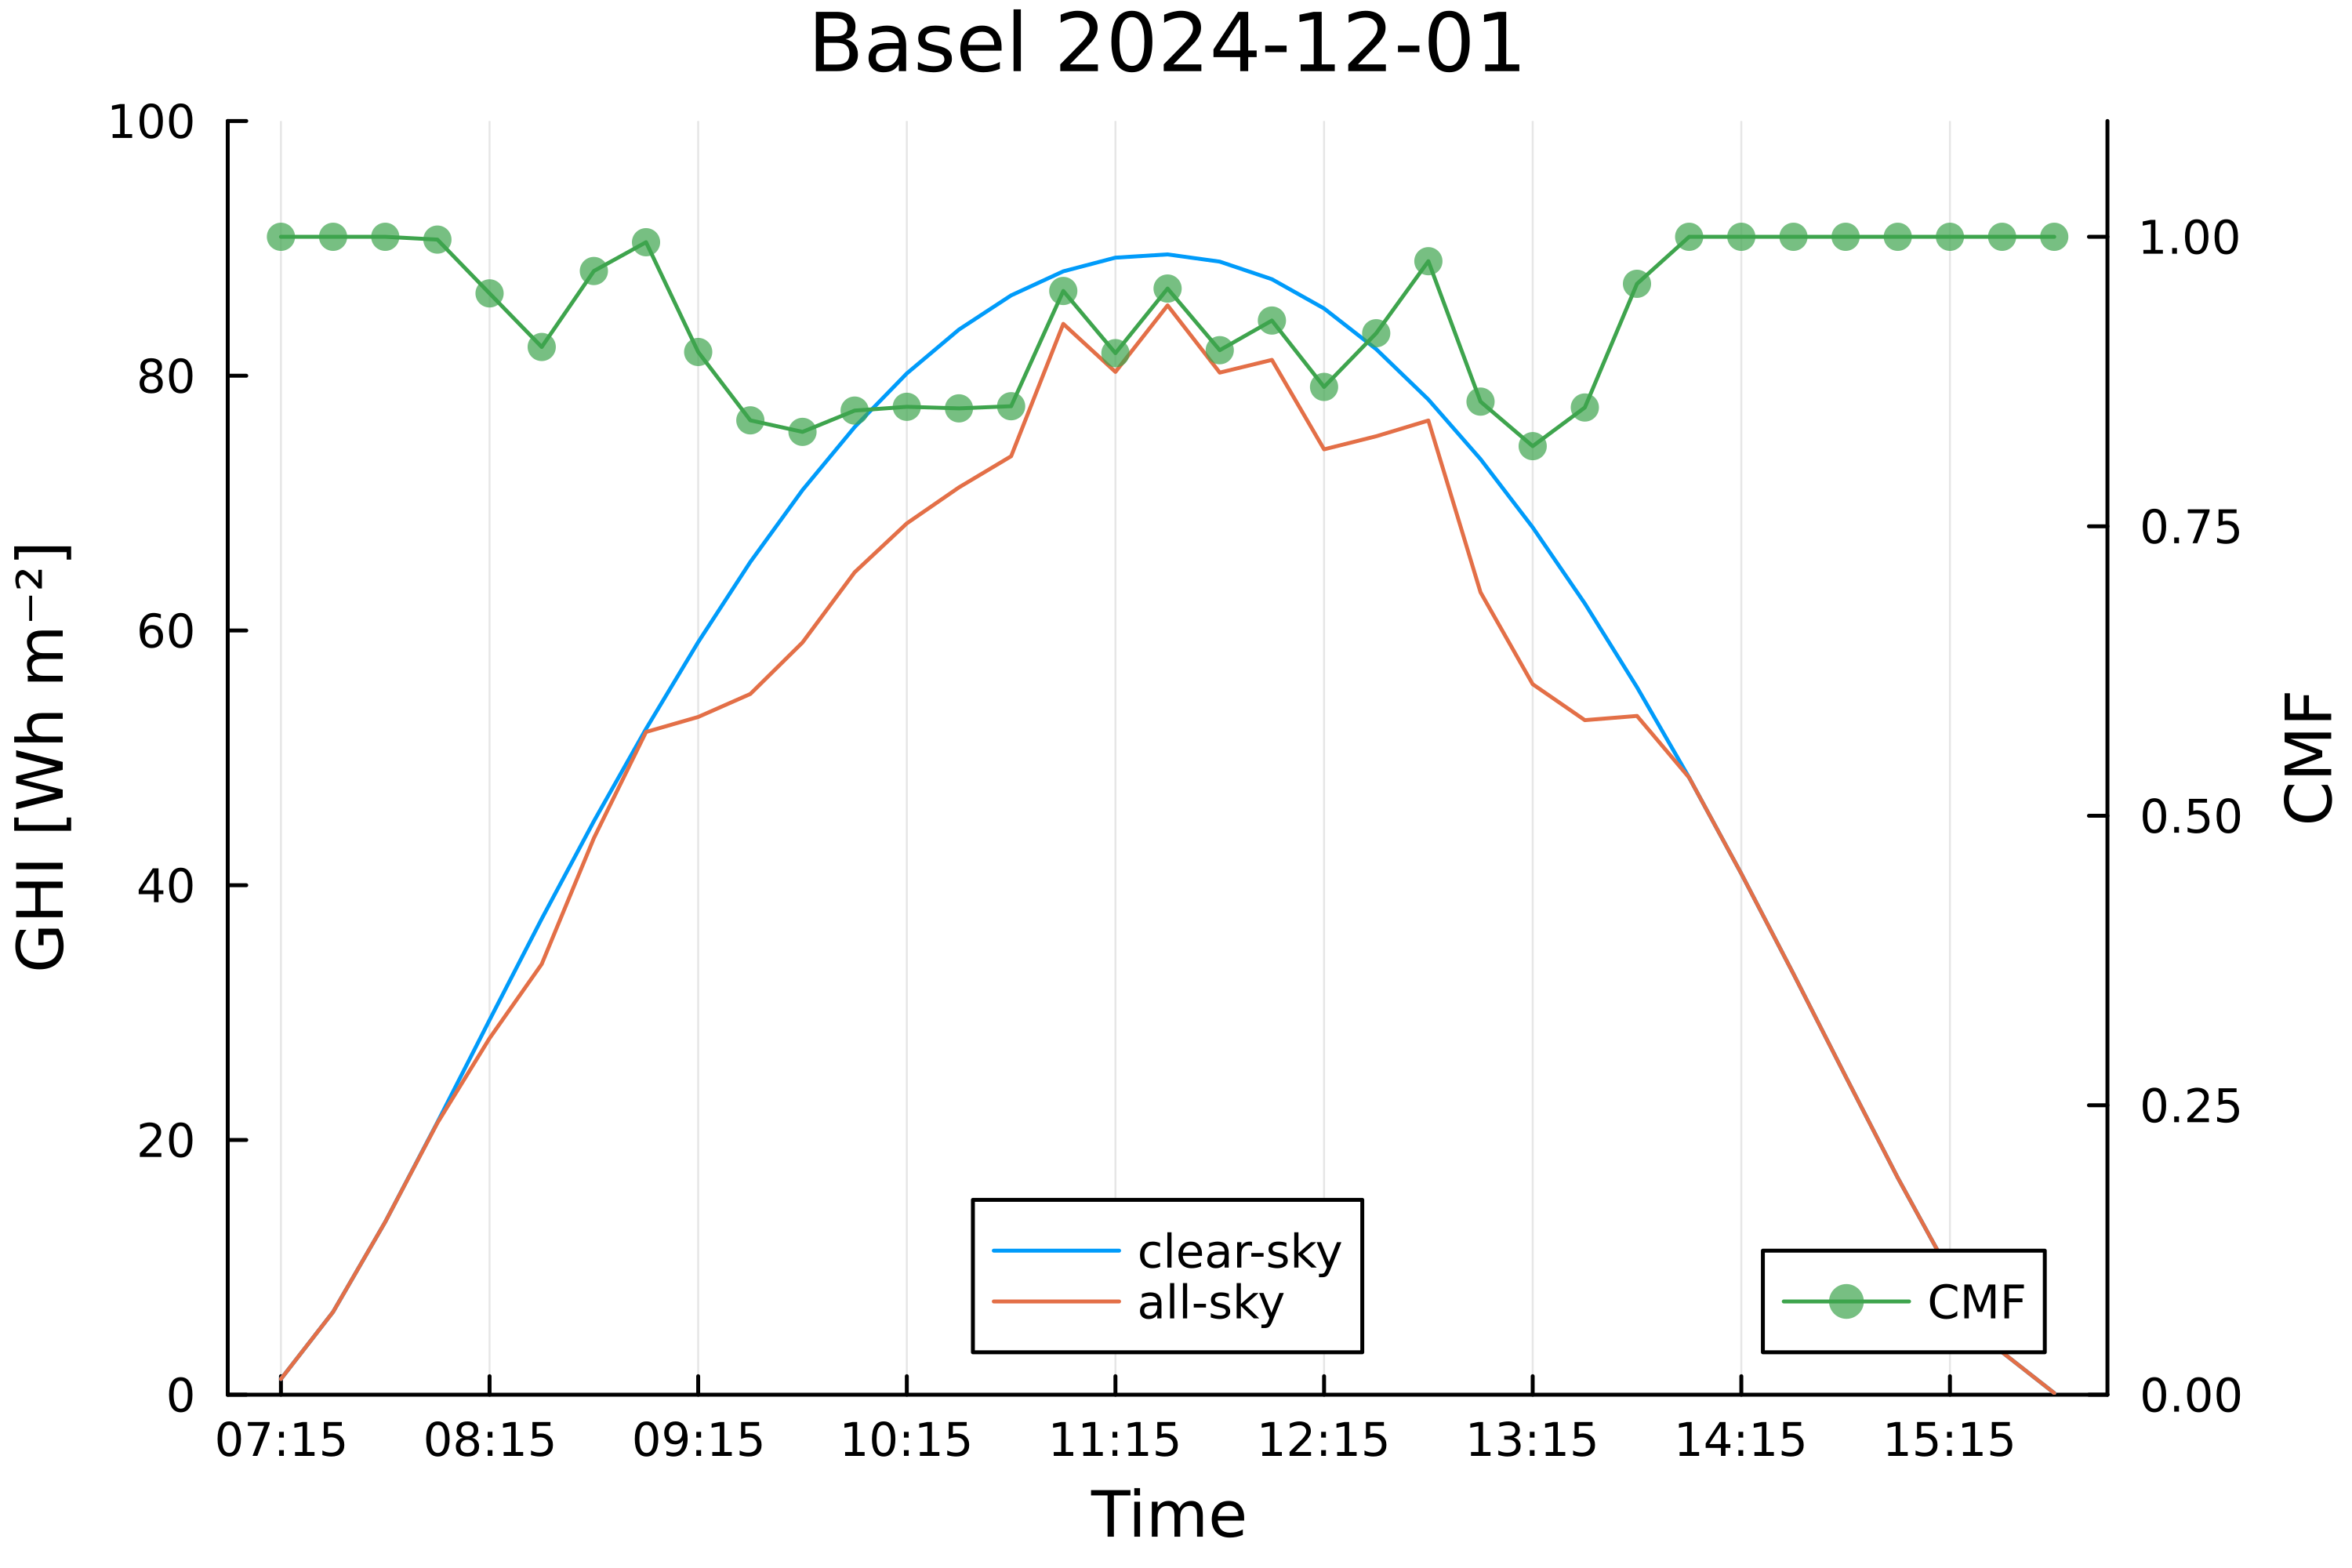

In [11]:
plot!(twinx(), df.dt, df.cmf, c=3, marker=(0.7, stroke(0)), lab="CMF", 
    ylim=(0,1.1), ylabel="CMF")

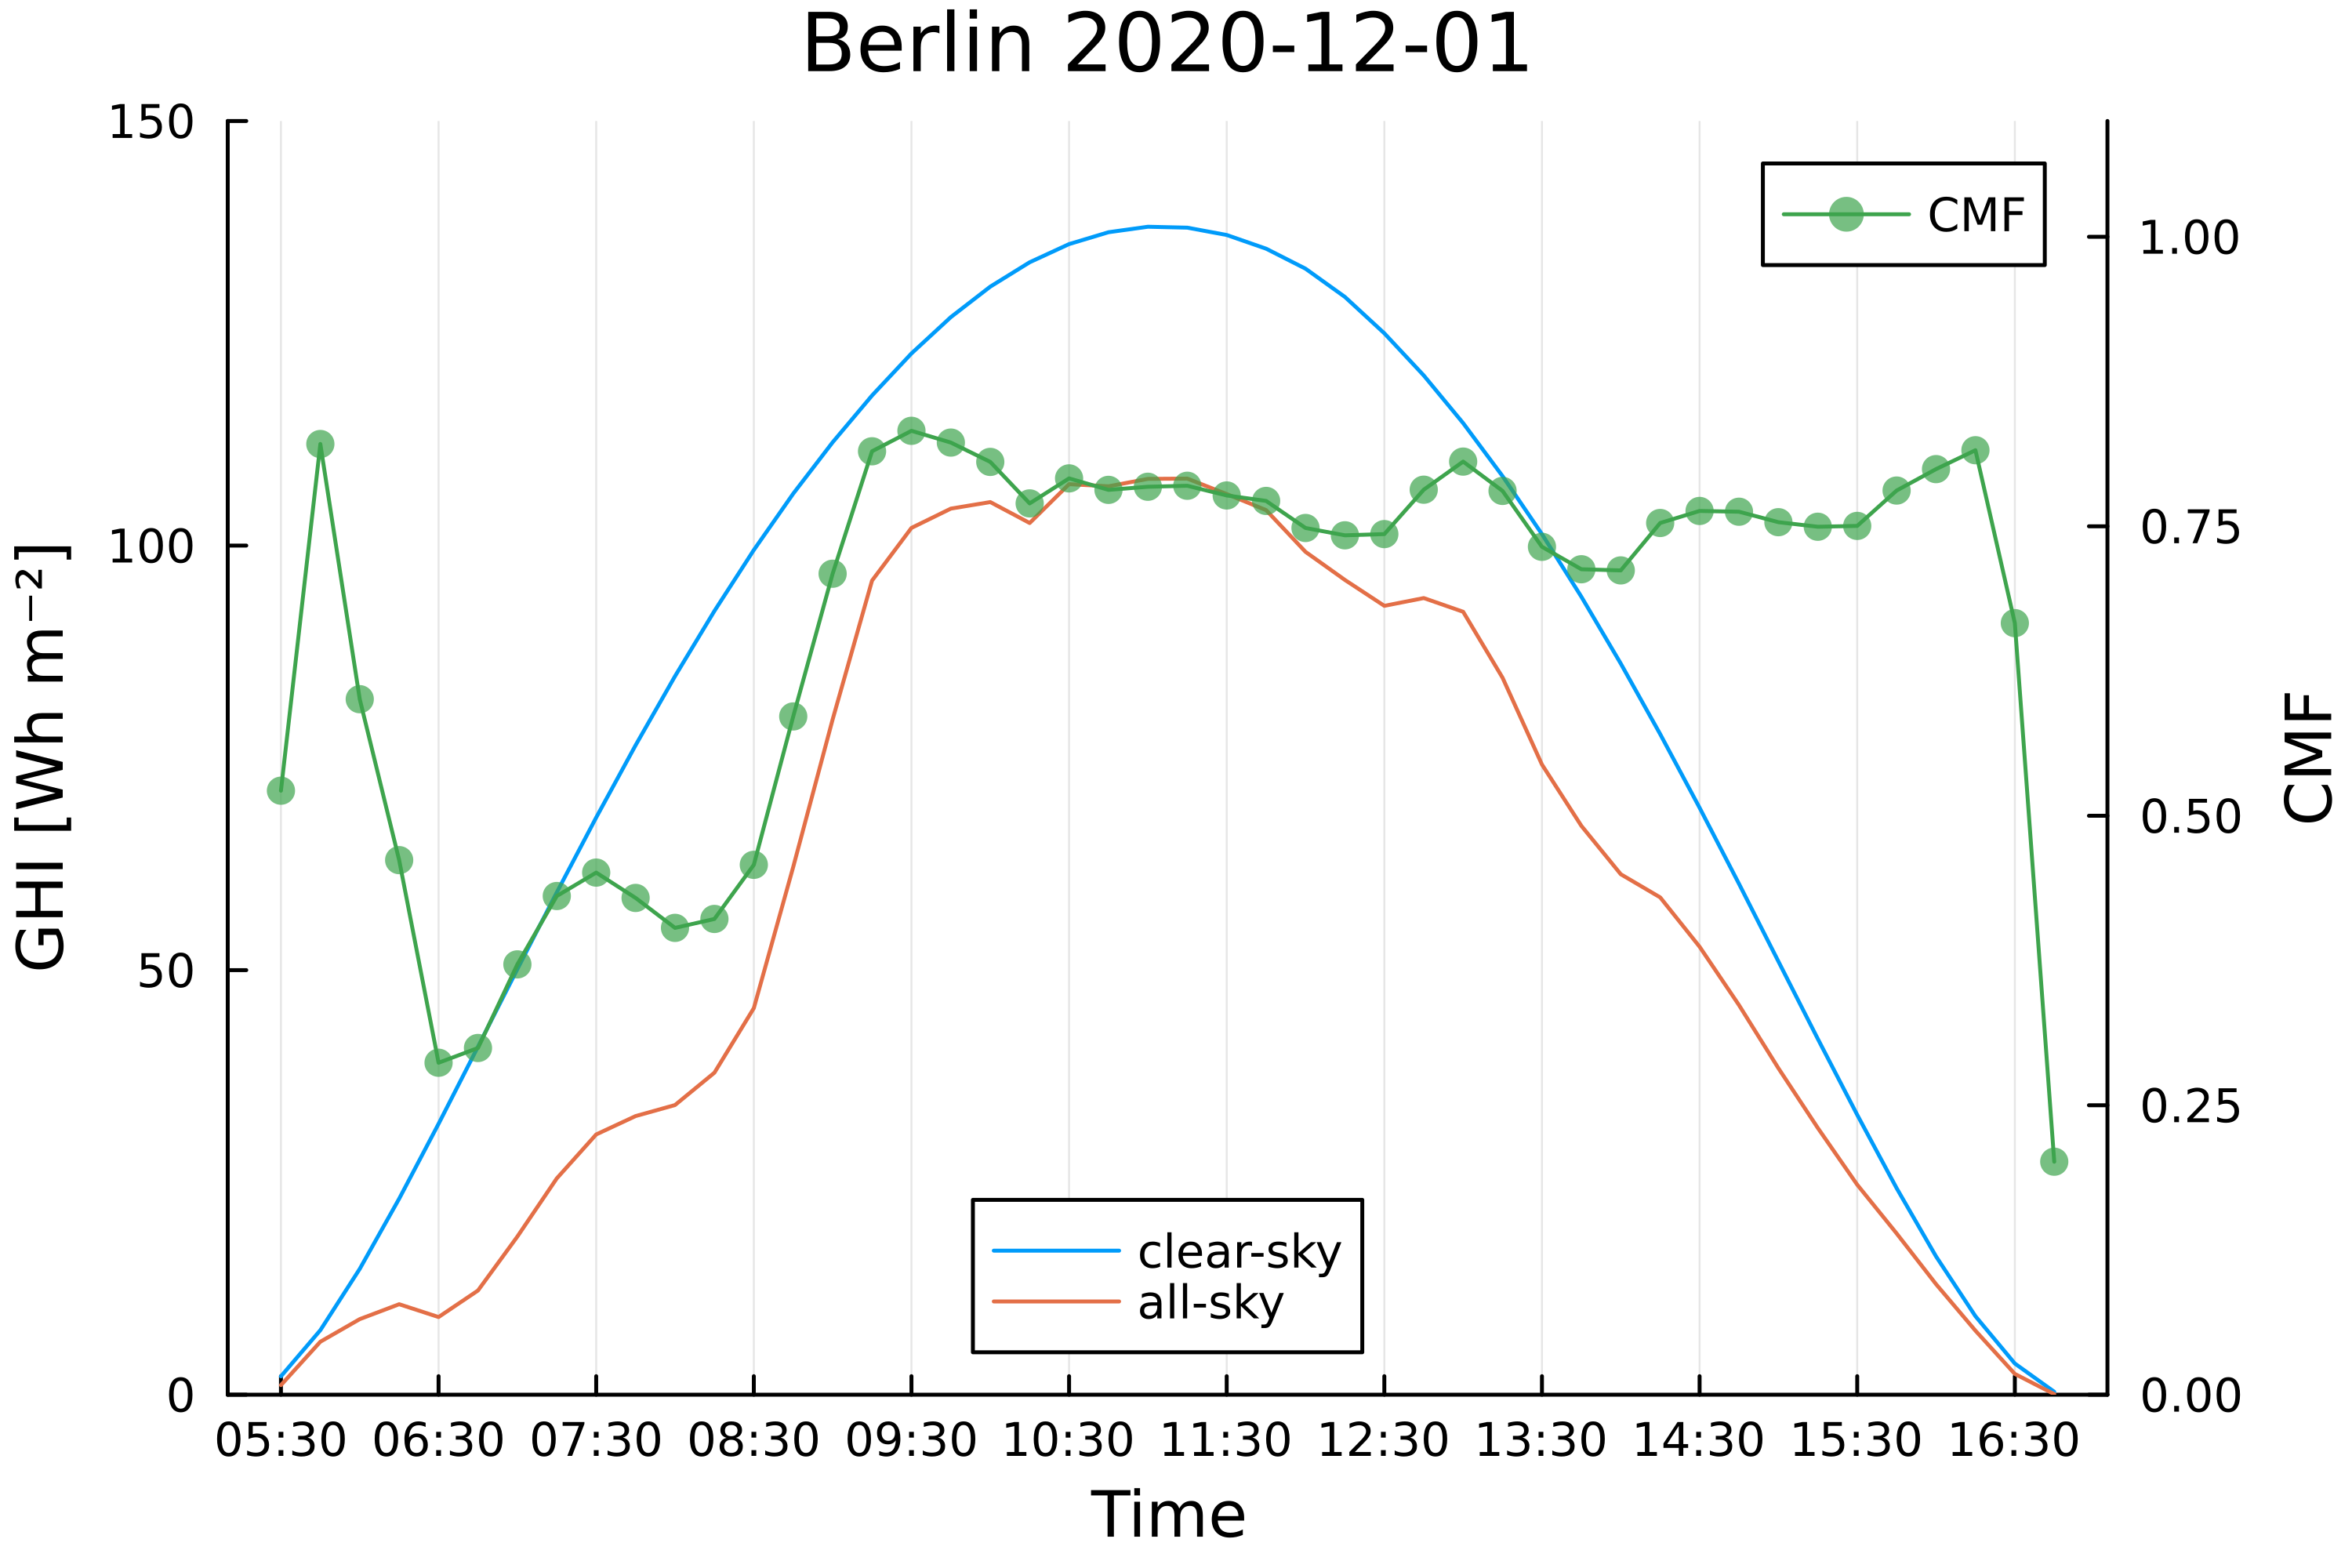

In [54]:
plot!(twinx(), df.dt, df.cmf, c=3, marker=(0.7, stroke(0)), lab="CMF", 
    ylim=(0,1.1), ylabel="CMF")

### Mon mn

In [12]:
gb = groupby(df_b, :mon)
ghi_mo = [mean(g.ghi) for g in gb]
cmf_mo = [mean(g.cmf) for g in gb];

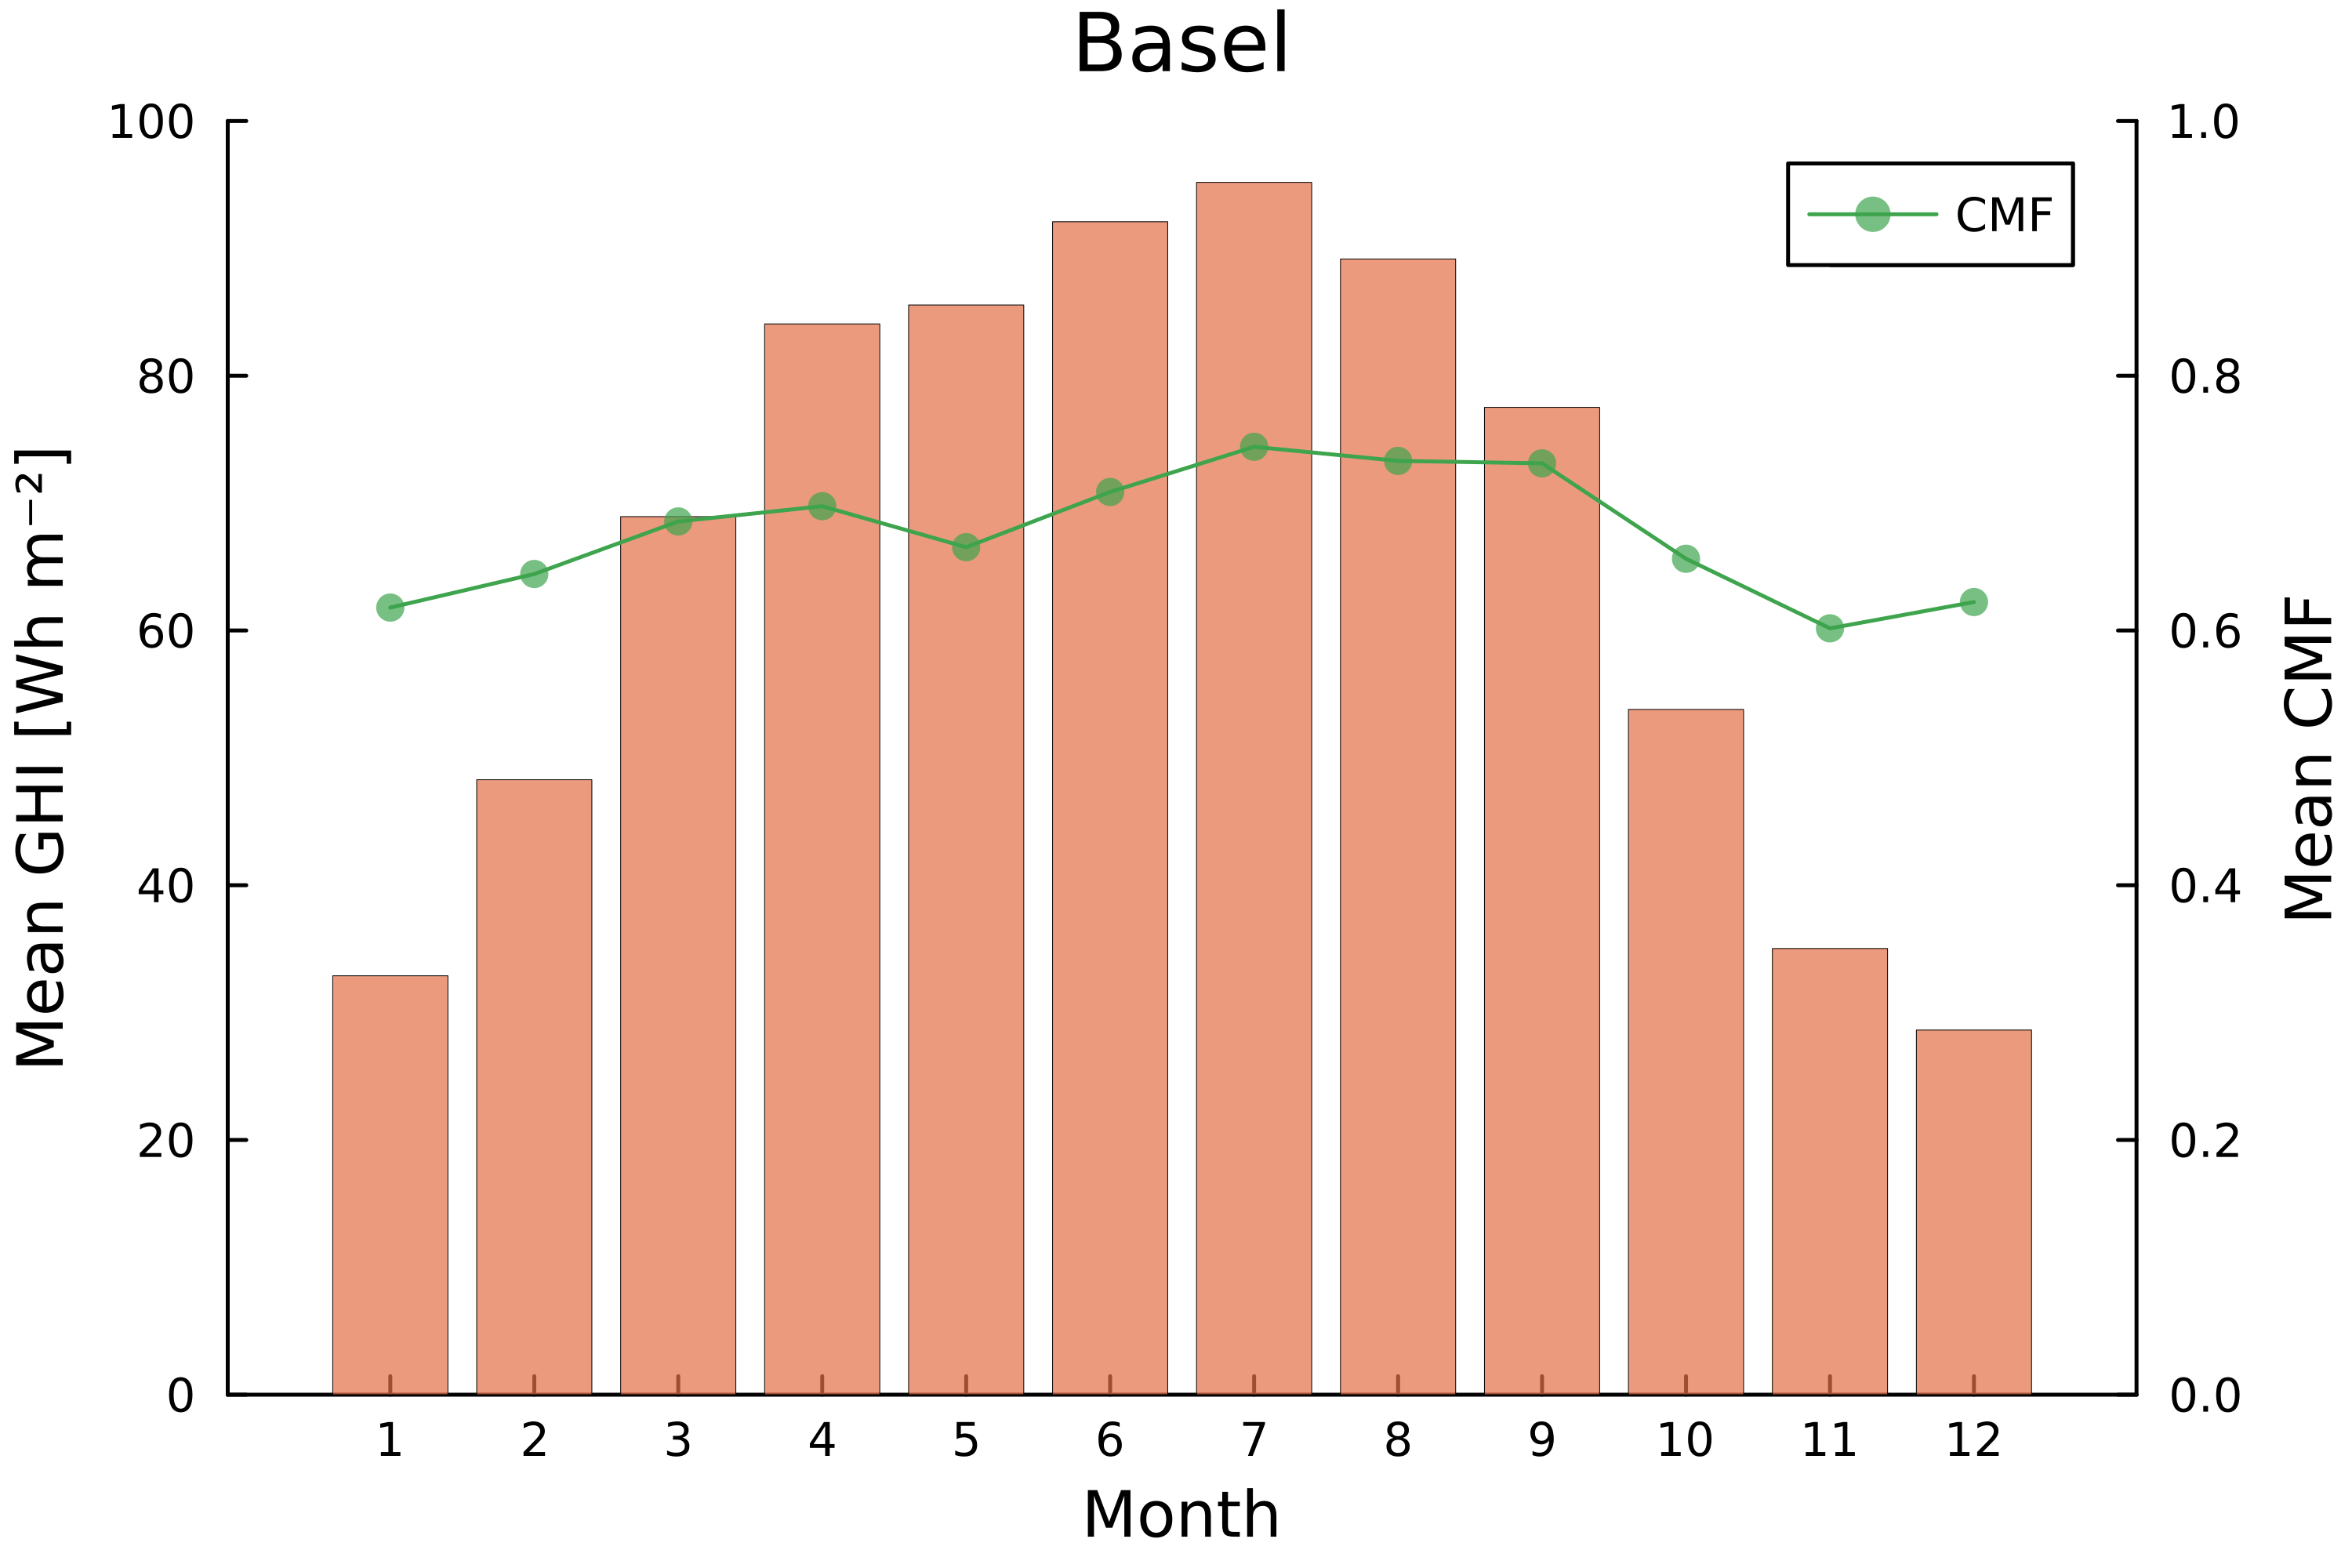

In [14]:
mon_bs = bar(ghi_mo, c=2, lw=0.2, fillalpha=.7, grid=:y,
    xtick=1:12, ylim=(0,100), xlabel="Month", ylabel="Mean GHI [Wh m⁻²]", title=city)
    plot!(twinx(), cmf_mo, c=3, marker=(0.7, stroke(0)), 
    xtick=1:12, ylim=(0,1), label="CMF", ylabel="Mean CMF") 

### split

In [7]:
yrVal = 2023
df_tr, df_val, df_te = splitVal(df_b, yrVal)
df_te

17997×8 DataFrame
   Row │ yr     mon   day   hr    min   ghi        ghiCS      cmf      
       │ Int16  Int8  Int8  Int8  Int8  Float64    Float64    Float64  
───────┼───────────────────────────────────────────────────────────────
     1 │  2024     1     1     7    30   0.289643   0.289643  1.0
     2 │  2024     1     1     7    45   4.19896    4.19896   1.0
     3 │  2024     1     1     8     0  10.8501    10.8501    1.0
     4 │  2024     1     1     8    15  18.5213    18.5213    1.0
     5 │  2024     1     1     8    30  26.3092    26.4952    0.99298
     6 │  2024     1     1     8    45  29.5154    34.3957    0.858116
     7 │  2024     1     1     9     0  32.216     42.0113    0.766841
     8 │  2024     1     1     9    15  35.6509    49.0756    0.72645
     9 │  2024     1     1     9    30  41.9669    55.4921    0.756269
    10 │  2024     1     1     9    45  45.1176    61.3276    0.735682
    11 │  2024     1     1    10     0  60.3731    66.5295    0.907464
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮        ⋮          ⋮         ⋮
 17988 │  2024    12    31    13    30  53.0683    62.9748    0.842691
 17989 │  2024    12    31    13    45  50.1113    56.9427    0.88003
 17990 │  2024    12    31    14     0  48.6099    50.3335    0.965755
 17991 │  2024    12    31    14    15  40.4794    43.2249    0.936483
 17992 │  2024    12    31    14    30  32.5591    35.7197    0.911515
 17993 │  2024    12    31    14    45  27.2007    27.9615    0.972791
 17994 │  2024    12    31    15     0  20.1632    20.1632    1.0
 17995 │  2024    12    31    15    15  12.6783    12.6783    1.0
 17996 │  2024    12    31    15    30   6.02951    6.02951   1.0
 17997 │  2024    12    31    15    45   1.17089    1.17089   1.0
                                                     17976 rows omitted

In [8]:
cmf_tr = df_tr.cmf

339956-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.9987647805358502
 0.9722963441386032
 ⋮
 0.7053679040902014
 0.6998577077584648
 0.7295968371137016
 0.763072901568999
 0.7679091528140048
 0.7532274415548951
 0.8234910012393938
 0.9557299741877265
 1.0
 1.0
 1.0
 1.0

In [9]:
cmf_tr_cls, binStarts, binMean = getBins(cmf_tr, N; op="el")

([19, 19, 19, 19, 19, 19, 19, 19, 19, 19  …  14, 15, 15, 14, 16, 19, 19, 19, 19, 19], [0.04383628790210572, 0.09174157041618101, 0.1396468529302563, 0.1875521354443316, 0.2354574179584069, 0.2833627004724822, 0.33126798298655746, 0.3791732655006328, 0.42707854801470807, 0.47498383052878335, 0.5228891130428587, 0.570794395556934, 0.6186996780710092, 0.6666049605850846, 0.7145102430991599, 0.7624155256132351, 0.8103208081273104, 0.8582260906413858, 0.906131373155461, 0.9540366556695363], [0.10532466911135763, 0.16142303098245306, 0.21153098644412438, 0.25940887653831424, 0.30723573445466024, 0.354824340287436, 0.40298749701462766, 0.4512224383178704, 0.49888454519516, 0.5470280355107168, 0.5949386672090966, 0.6429312740428258, 0.6910210385647574, 0.7384534389244899, 0.7864635713803165, 0.8342107510782468, 0.8819885153374292, 0.9306538558691289, 0.9973690486906498, 1.0019419381836117])

In [10]:
ticks = rd.(binMean, 2)

20-element Vector{Float64}:
 0.11
 0.16
 0.21
 0.26
 0.31
 0.35
 0.4
 0.45
 0.5
 0.55
 0.59
 0.64
 0.69
 0.74
 0.79
 0.83
 0.88
 0.93
 1.0
 1.0

In [11]:
xti = (binMean[[1:2:18; N]], ticks[[1:2:18; N]]);

#### distri

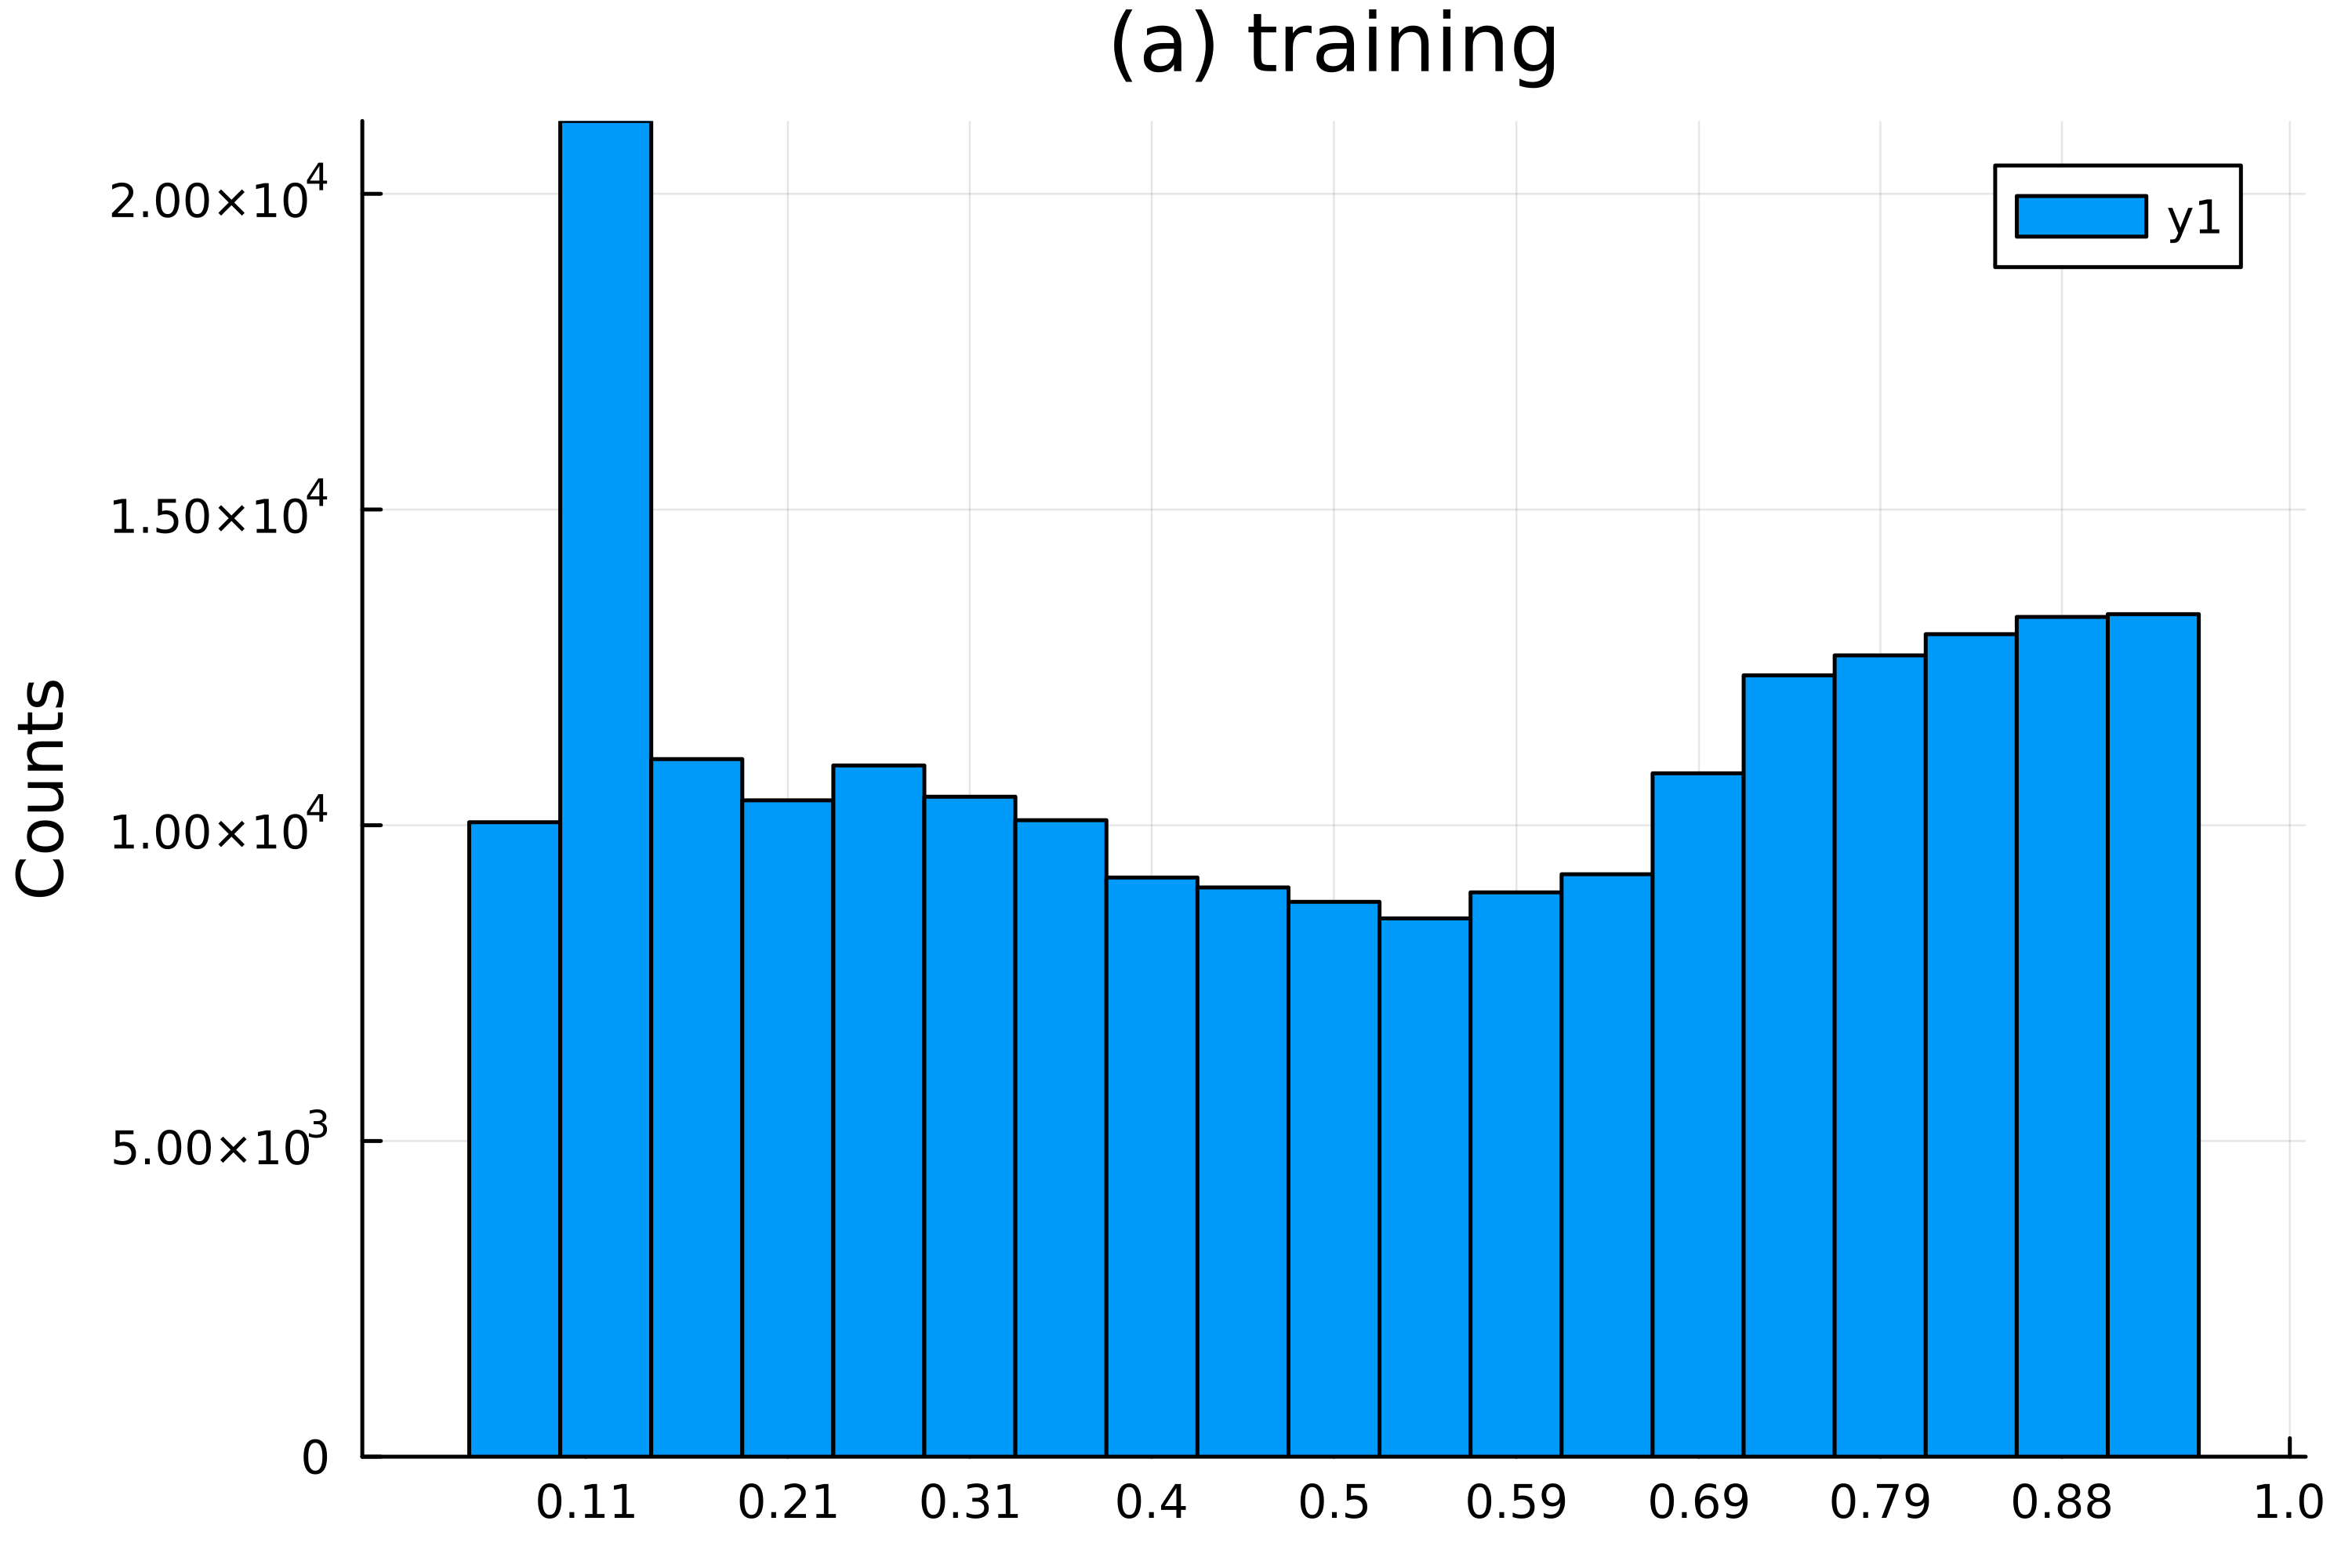

In [26]:
h_train = histogram(cmf_tr, bins=binStarts, xticks=xti, ylabel="Counts",
    title="(a) training")

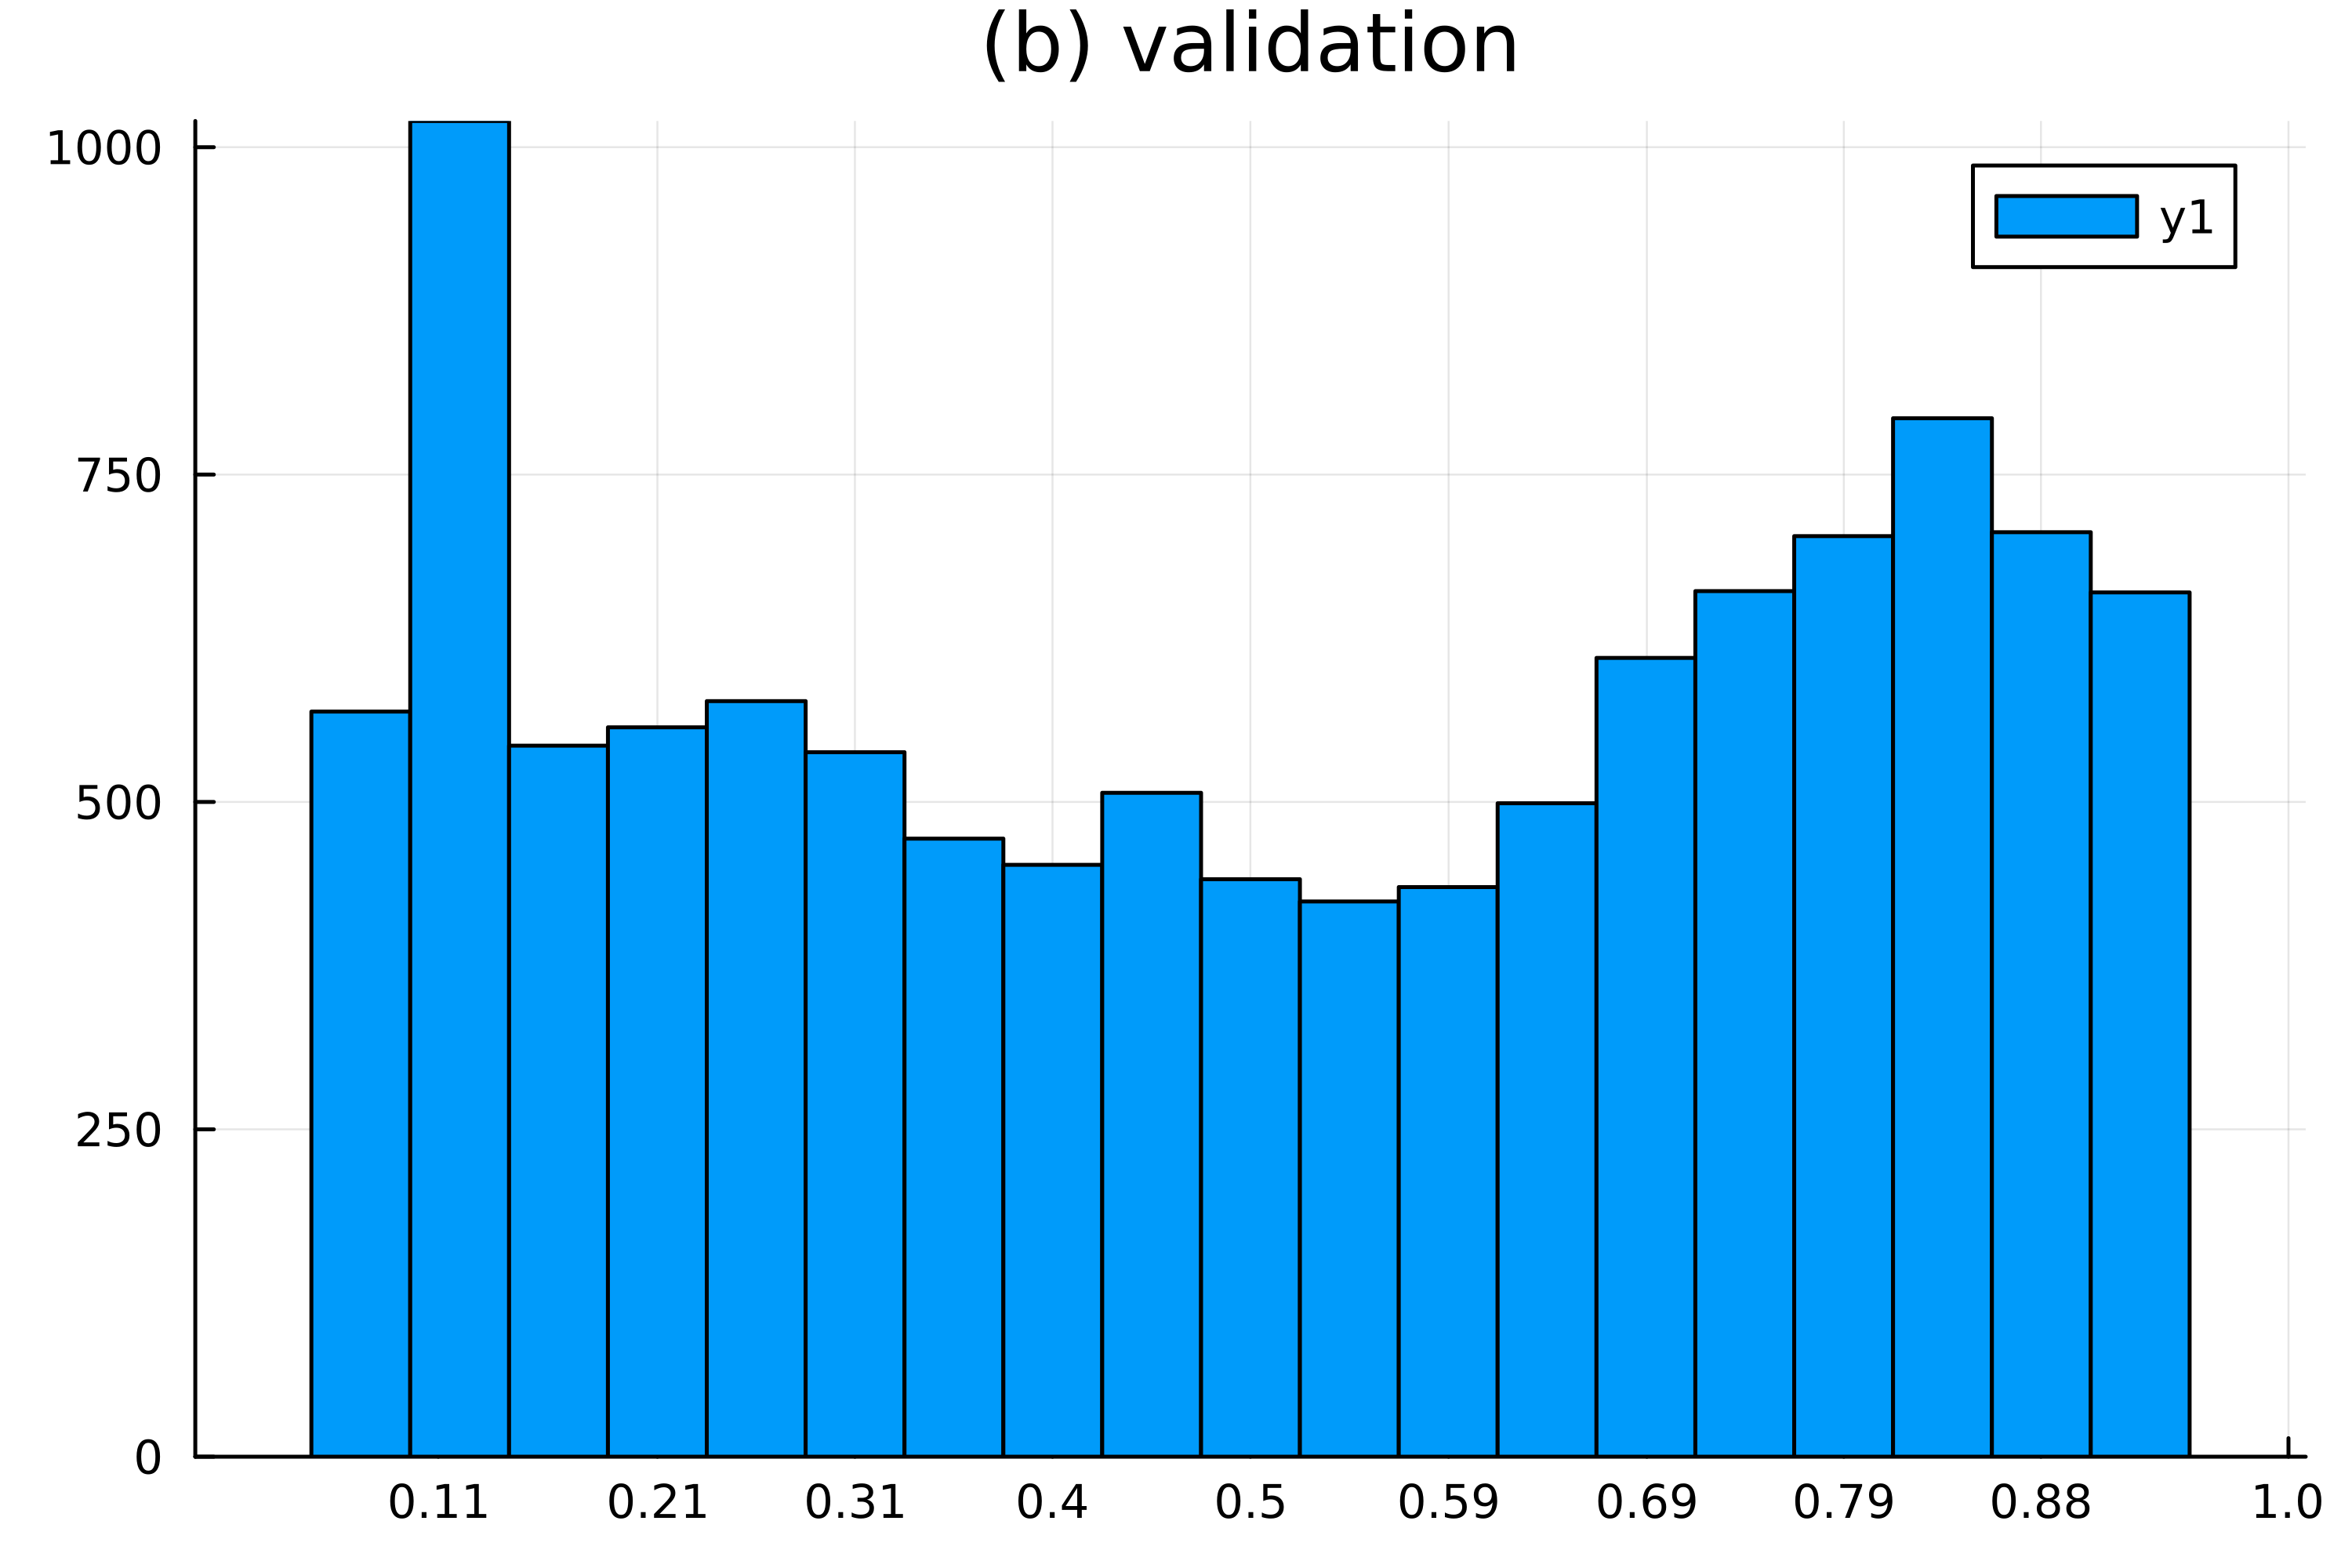

In [27]:
h_val = histogram(df_val.cmf, bins=binStarts, xticks=xti, 
    title="(b) validation")

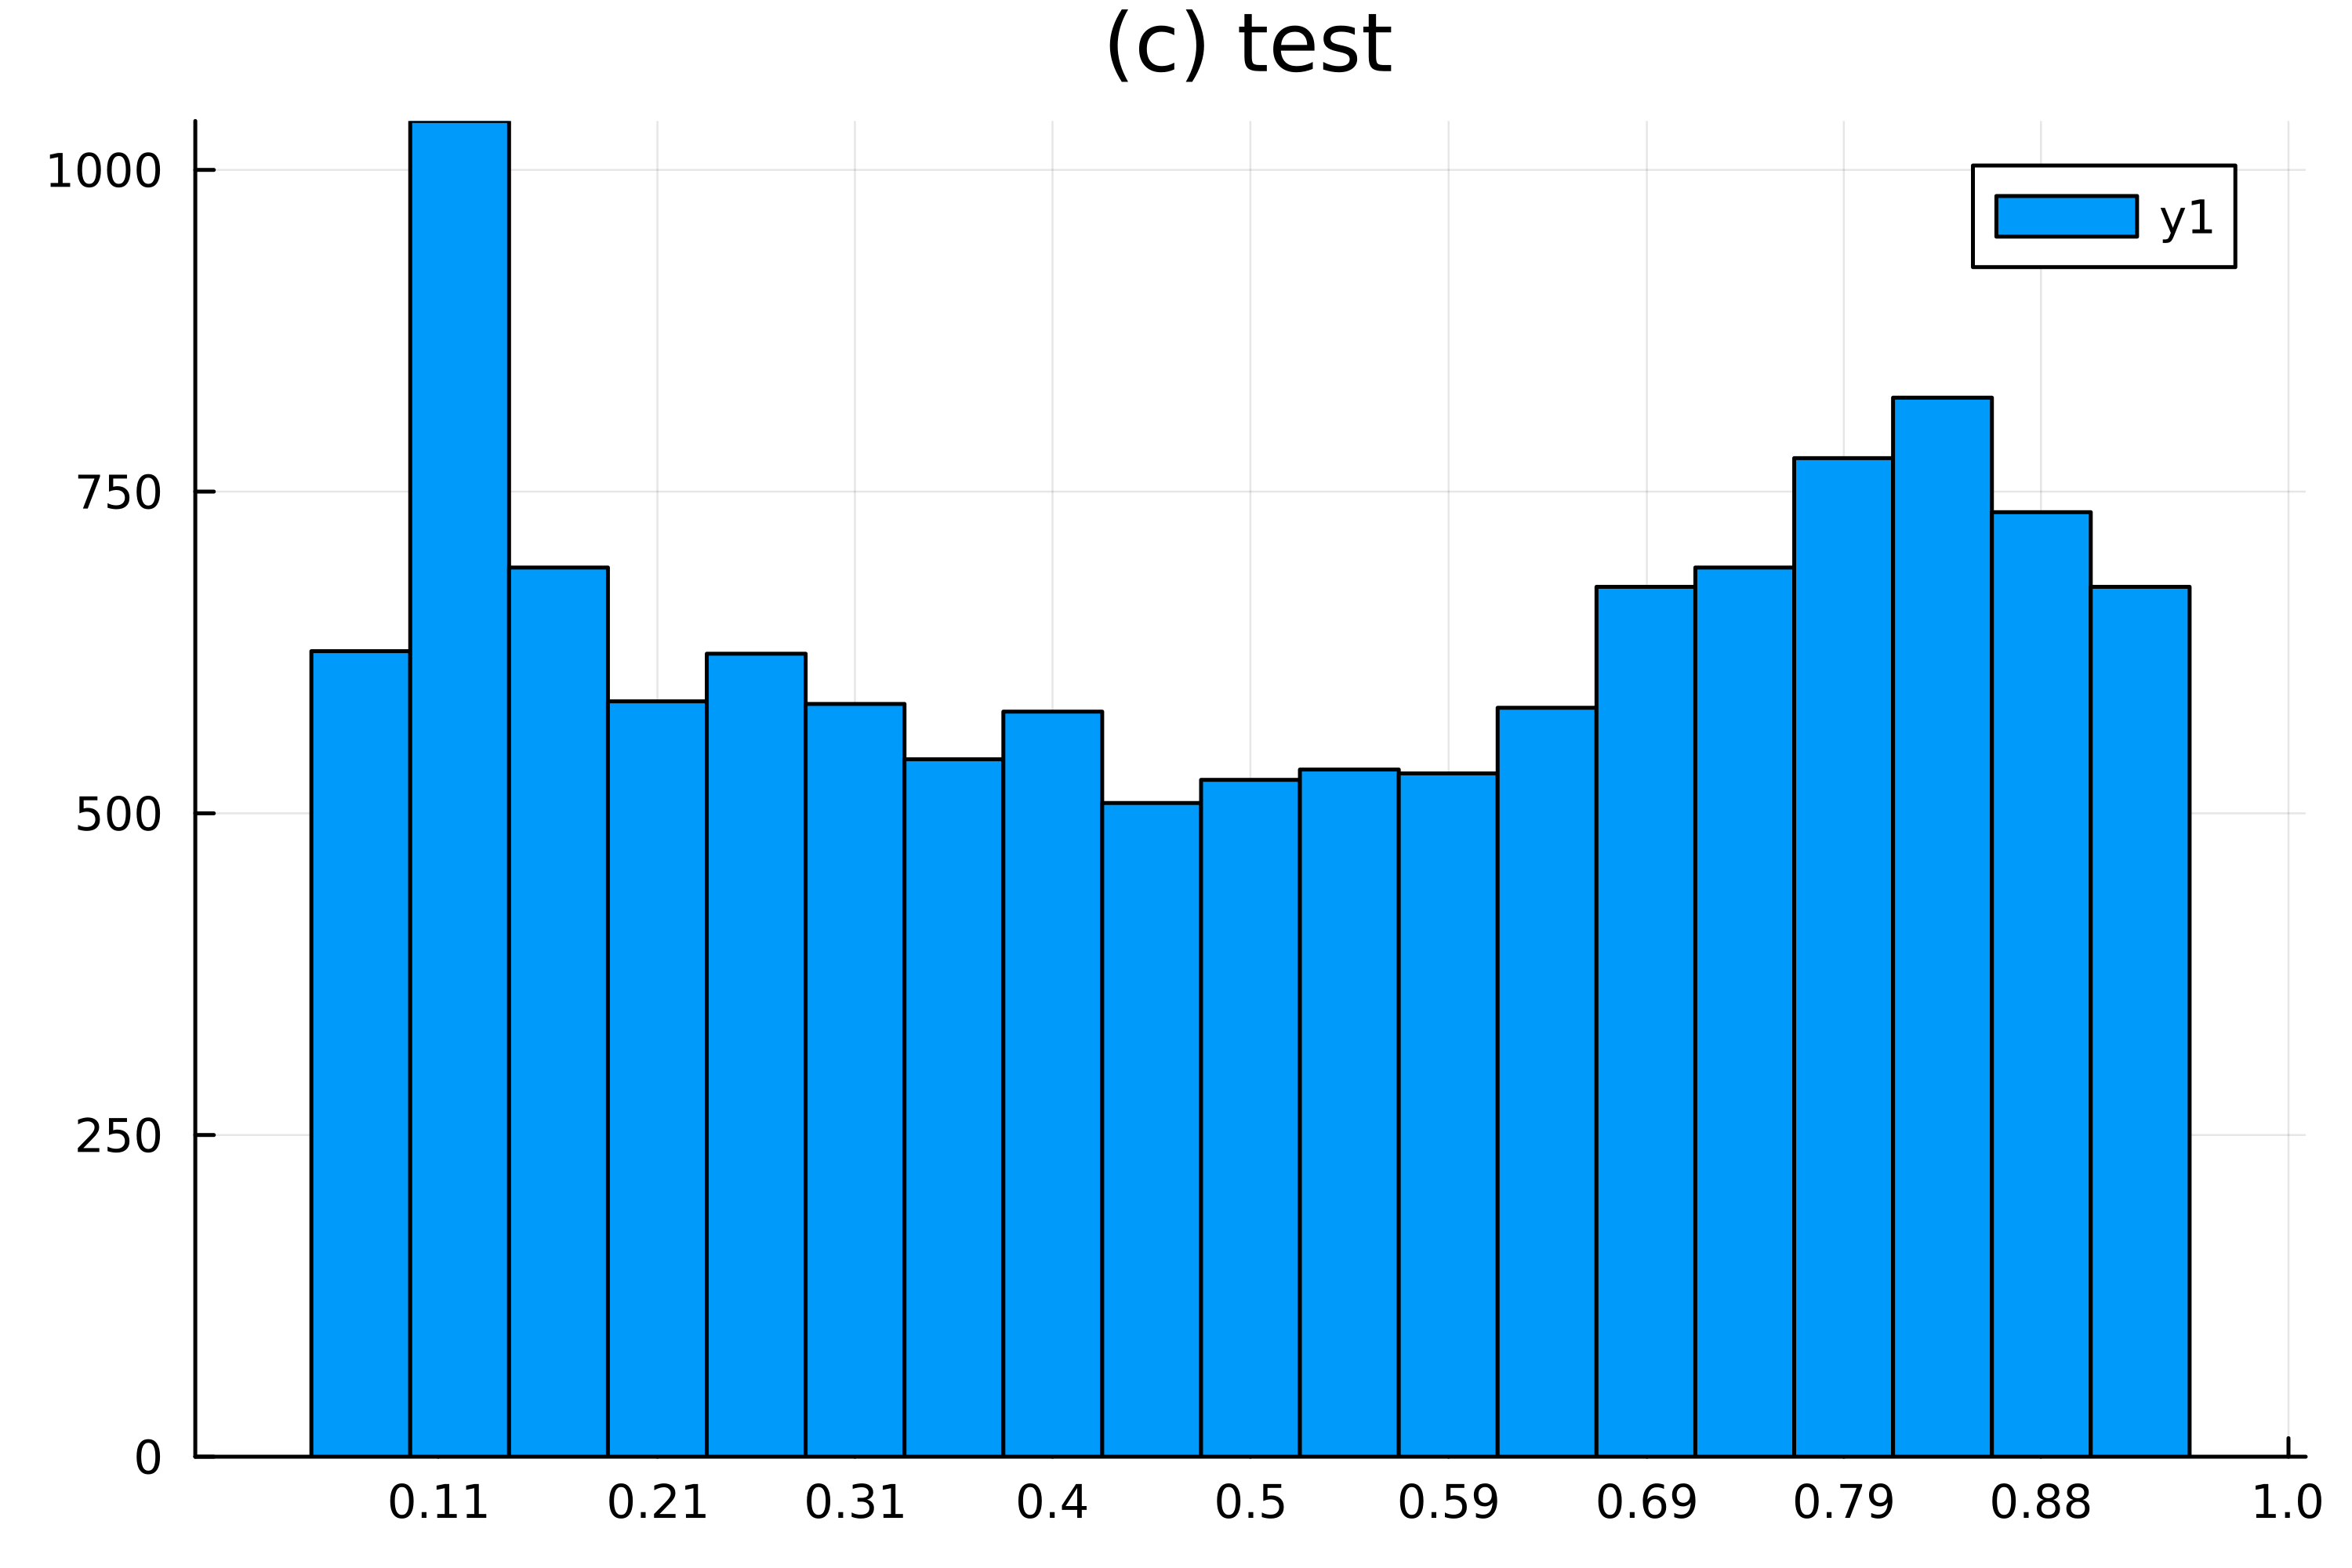

In [28]:
h_test = histogram(df_te.cmf, bins=binStarts, xticks=xti, 
    title="(c) test")

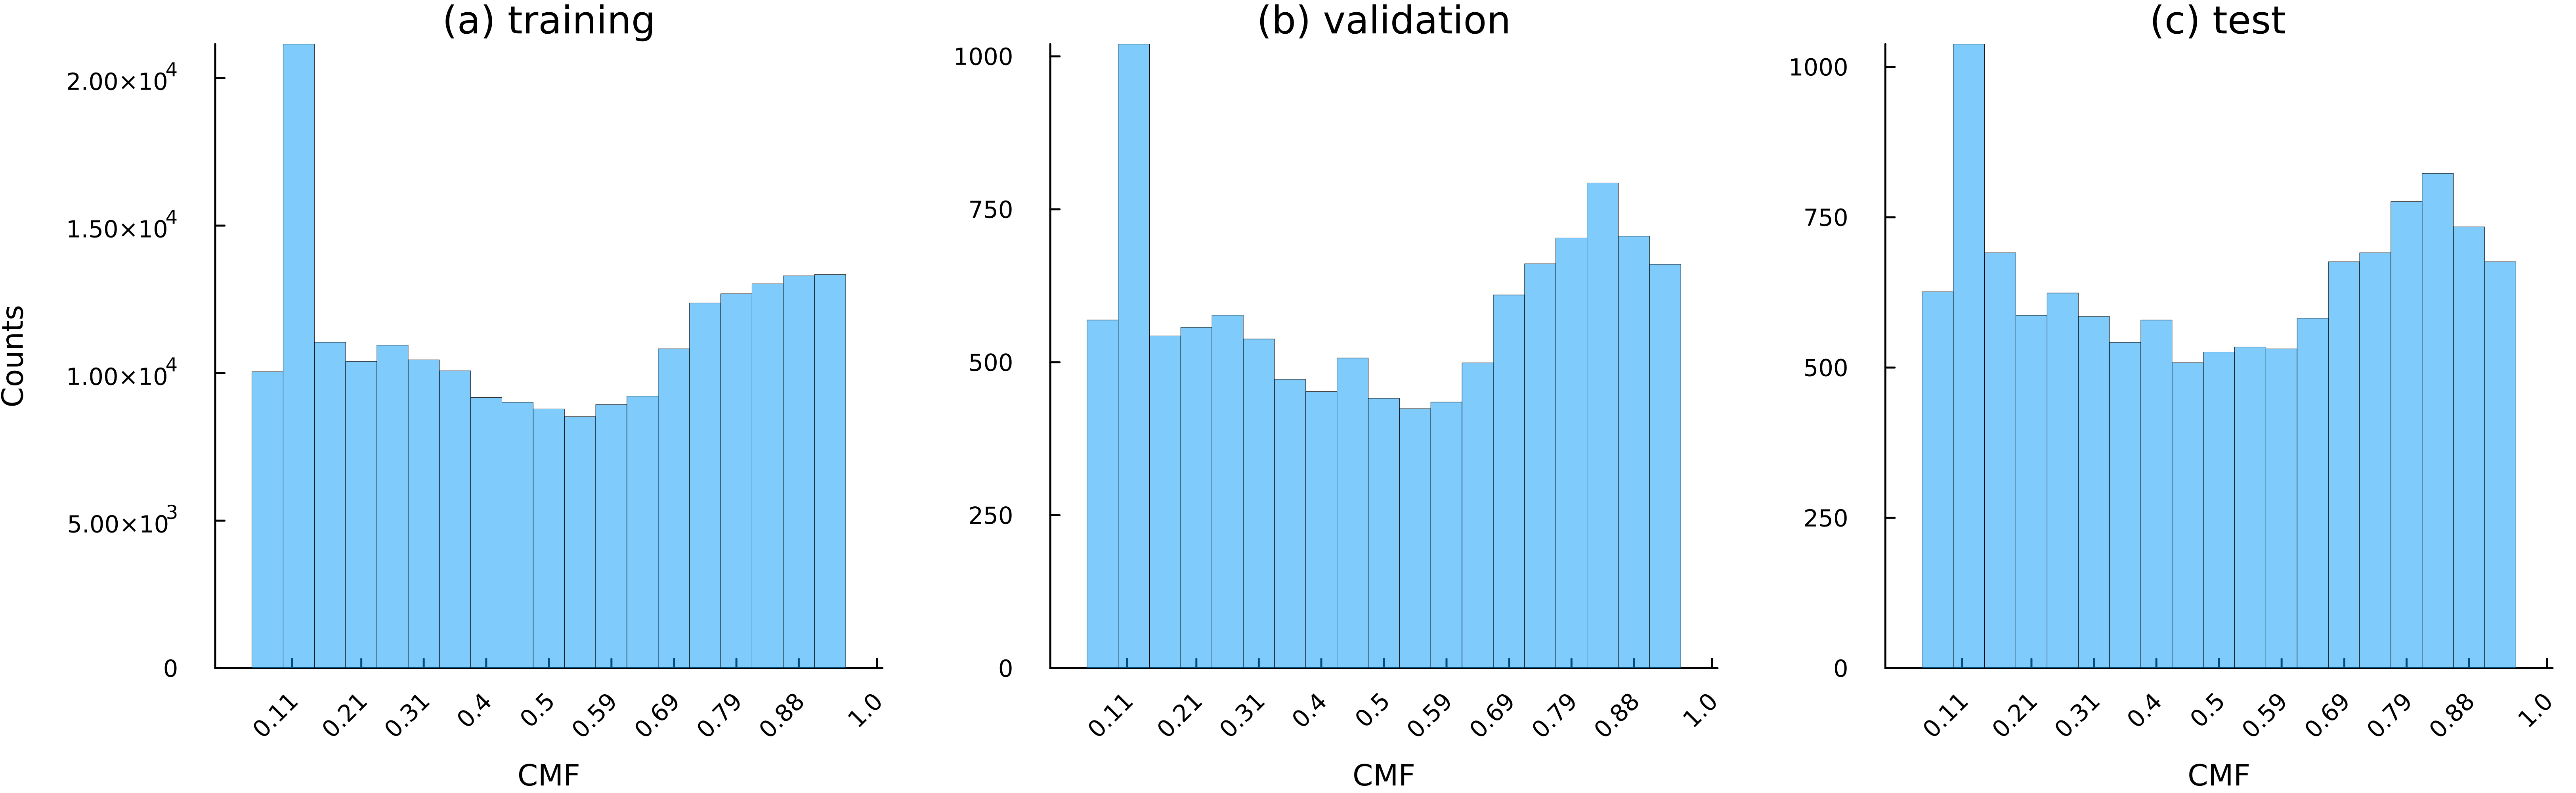

In [29]:
hists = plot(h_train, h_val, h_test, layout=@layout([a b c]), leg=false, grid=false, xlabel="CMF", xrotation=45, 
    lw=0.2, fillalpha=0.5, labelfontsize=10, titlefontsize=13, tickfontsize=8, #ylim=(0, ),
    leftmargin=20px, bottommargin=30px, size=(1300,400))

### MC

In [51]:
n = N
od = 2;

In [49]:
function getDF(df0, od, steps; n=N) #, d_neib=test_neib_w, data_train_cls=data_train_cls, binStarts=binStarts, binMean=binMean) # df, 1-d array, 1-d array
    df = df0[(od+steps-1):(end-1), :]
    df.pers = df0.cmf[1:(end-od-steps+1)]
    df.neib = df_b_w.cmf[1:(end-od-steps+1)] 
    T = mcFit(cmf_tr_cls, od, n) # transition matrix
    filter!(:cmf=> c-> !isnan(c), df) # remove nan in central real series 
    pred = mcPredict(df.cmf, od, n, T, binStarts, binMean)   
    df.pred = vcat(ones(od+steps-1) * NaN, pred[1:end-steps])  

    if steps > 1 
        if od == 1
            pred_n = predict_steps_1d(T, binStarts, binMean, df.cmf, od, n; steps=steps)
        elseif od == 2
            pred_n = predict_steps_2d(T, binStarts, binMean, df.cmf, od, n; steps=steps)
        elseif od == 3
            pred_n = predict_steps_3d(T, binStarts, binMean, df.cmf, od, n; steps=steps)
        end
        df.pred_n = vcat(ones(od+steps-1) * NaN, pred_n[1:end-steps], ones(steps) * NaN)
        filter!(:pred_n => p_n -> !isnan(p_n), df)
        df.dif_pred_n = df.pred_n .- df.cmf 
    end    
    filter!([:neib, :pers, :pred] => (n, pe, pr) -> (!isnan(n) & !isnan(pe) & !isnan(pr)), df)
    # filter!([:pers, :pred] => (pe, pr) -> (!isnan(pe) & !isnan(pr)), df);

    df.real_cls = classify(df.cmf, binStarts)
    df.dif_pers = df.pers .- df.cmf
    df.dif_neib = df.neib .- df.cmf
    df.dif_pred = df.pred .- df.cmf
    return df
end

getDF (generic function with 2 methods)

In [26]:
steps = 1
df21v = getDF(df_val, od, steps)
df21t = getDF(df_te, od, steps)

17993×13 DataFrame
   Row │ yr     mon   day   hr    min   ghi       ghiCS     cmf       pers      pred      real_cls  dif_pers     dif_pred    
       │ Int16  Int8  Int8  Int8  Int8  Float64   Float64   Float64   Float64   Float64   Int64     Float64      Float64     
───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │  2024     1     1     8    15  18.5213   18.5213   1.0       1.0       0.970449        19   0.0         -0.0295508
     2 │  2024     1     1     8    30  26.3092   26.4952   0.99298   1.0       0.970449        19   0.00701987  -0.022531
     3 │  2024     1     1     8    45  29.5154   34.3957   0.858116  0.99298   0.970449        17   0.134865     0.112334
     4 │  2024     1     1     9     0  32.216    42.0113   0.766841  0.858116  0.853951        16   0.0912745    0.0871103
     5 │  2024     1     1     9    15  35.6509   49.0756   0.72645   0.766841  0.830484        15   0.0403916    0.104035
     6 │  2024     1     1     9    30  41.9669   55.4921   0.756269  0.72645   0.770488        15  -0.0298192    0.0142191
     7 │  2024     1     1     9    45  45.1176   61.3276   0.735682  0.756269  0.781767        15   0.0205869    0.0460851
     8 │  2024     1     1    10     0  60.3731   66.5295   0.907464  0.735682  0.781767        19  -0.171782    -0.125697
     9 │  2024     1     1    10    15  49.6876   71.0538   0.699295  0.907464  0.924368        14   0.208169     0.225073
    10 │  2024     1     1    10    30  22.7735   74.8702   0.304173  0.699295  0.664975         6   0.395122     0.360802
    11 │  2024     1     1    10    45  37.8958   77.9455   0.486183  0.304173  0.320527        10  -0.18201     -0.165656
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮
 17984 │  2024    12    31    13    15  60.3058   68.3695   0.882057  0.994701  0.970449        18   0.112644     0.0883921
 17985 │  2024    12    31    13    30  53.0683   62.9748   0.842691  0.882057  0.921796        17   0.0393663    0.079105
 17986 │  2024    12    31    13    45  50.1113   56.9427   0.88003   0.842691  0.877936        18  -0.0373394   -0.00209411
 17987 │  2024    12    31    14     0  48.6099   50.3335   0.965755  0.88003   0.932872        19  -0.0857252   -0.0328835
 17988 │  2024    12    31    14    15  40.4794   43.2249   0.936483  0.965755  0.964368        19   0.0292726    0.0278847
 17989 │  2024    12    31    14    30  32.5591   35.7197   0.911515  0.936483  0.970449        19   0.0249682    0.0589345
 17990 │  2024    12    31    14    45  27.2007   27.9615   0.972791  0.911515  0.970449        19  -0.0612767   -0.00234218
 17991 │  2024    12    31    15     0  20.1632   20.1632   1.0       0.972791  0.970449        19  -0.0272087   -0.0295508
 17992 │  2024    12    31    15    15  12.6783   12.6783   1.0       1.0       0.970449        19   0.0         -0.0295508
 17993 │  2024    12    31    15    30   6.02951   6.02951  1.0       1.0       0.970449        19   0.0         -0.0295508
                                                                                                           17972 rows omitted

In [27]:
df1t = hybrid(df21v, df21t, steps)

17993×19 DataFrame
   Row │ yr     mon   day   hr    min   ghi       ghiCS     cmf       pers      pred      real_cls  dif_pers     dif_pred     mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m    dif_hyb_r   
       │ Int16  Int8  Int8  Int8  Int8  Float64   Float64   Float64   Float64   Float64   Int64     Float64      Float64      Int64    Float64   Int64     Float64   Float64      Float64     
───────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │  2024     1     1     8    15  18.5213   18.5213   1.0       1.0       0.970449        19   0.0         -0.0295508         0  1.0              0  1.0        0.0          0.0
     2 │  2024     1     1     8    30  26.3092   26.4952   0.99298   1.0       0.970449        19   0.00701987  -0.022531          1  1.0              2  0.970449   0.00701987  -0.022531
     3 │  2024     1     1     8    45  29.5154   34.3957   0.858116  0.99298   0.970449        17   0.134865     0.112334          1  0.99298          2  0.970449   0.134865     0.112334
     4 │  2024     1     1     9     0  32.216    42.0113   0.766841  0.858116  0.853951        16   0.0912745    0.0871103         1  0.858116         1  0.858116   0.0912745    0.0912745
     5 │  2024     1     1     9    15  35.6509   49.0756   0.72645   0.766841  0.830484        15   0.0403916    0.104035          1  0.766841         2  0.830484   0.0403916    0.104035
     6 │  2024     1     1     9    30  41.9669   55.4921   0.756269  0.72645   0.770488        15  -0.0298192    0.0142191         1  0.72645          2  0.770488  -0.0298192    0.0142191
     7 │  2024     1     1     9    45  45.1176   61.3276   0.735682  0.756269  0.781767        15   0.0205869    0.0460851         1  0.756269         2  0.781767   0.0205869    0.0460851
     8 │  2024     1     1    10     0  60.3731   66.5295   0.907464  0.735682  0.781767        19  -0.171782    -0.125697          1  0.735682         2  0.781767  -0.171782    -0.125697
     9 │  2024     1     1    10    15  49.6876   71.0538   0.699295  0.907464  0.924368        14   0.208169     0.225073          1  0.907464         2  0.924368   0.208169     0.225073
    10 │  2024     1     1    10    30  22.7735   74.8702   0.304173  0.699295  0.664975         6   0.395122     0.360802          1  0.699295         2  0.664975   0.395122     0.360802
    11 │  2024     1     1    10    45  37.8958   77.9455   0.486183  0.304173  0.320527        10  -0.18201     -0.165656          1  0.304173         1  0.304173  -0.18201     -0.18201
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮          ⋮        ⋮         ⋮         ⋮           ⋮            ⋮
 17984 │  2024    12    31    13    15  60.3058   68.3695   0.882057  0.994701  0.970449        18   0.112644     0.0883921         1  0.994701         2  0.970449   0.112644     0.0883921
 17985 │  2024    12    31    13    30  53.0683   62.9748   0.842691  0.882057  0.921796        17   0.0393663    0.079105          2  0.921796         2  0.921796   0.079105     0.079105
 17986 │  2024    12    31    13    45  50.1113   56.9427   0.88003   0.842691  0.877936        18  -0.0373394   -0.00209411        1  0.842691         1  0.842691  -0.0373394   -0.0373394
 17987 │  2024    12    31    14     0  48.6099   50.3335   0.965755  0.88003   0.932872        19  -0.0857252   -0.0328835         2  0.932872         2  0.932872  -0.0328835   -0.0328835
 17988 │  2024    12    31    14    15  40.4794   43.2249   0.936483  0.965755  0.964368        19   0.0292726    0.0278847         1  0.965755         2  0.964368   0.0292726    0.0278847
 17989 │  2024    12    31    14    30  32.5591   35.7197   0.911515  0.936483  0.970449        19   0.0249682    0.0589345         1  0.936483         2  0.970449   0.0249682    0.0589345
 17990 │  2024    12    3

In [54]:
steps = 2
df22v = getDF(df_val, od, steps)

LoadError: ArgumentError: New columns must have the same length as old columns

In [53]:
df22t = getDF(df_te, od, steps)

LoadError: ArgumentError: New columns must have the same length as old columns

In [24]:
function hybrid(df_v, dfB, steps) # eval yr, B test yr
    gb = groupby(df_v, :real_cls)
#     if err == "mae"
    mae_pers = [meanad(g.pers, g.cmf) for g in gb]
    mae_pred = [meanad(g.pred, g.cmf) for g in gb]
    # mae_neib = [meanad(g.neib, g.cmf) for g in gb]
    df1 = DataFrame(:mae_pers=>mae_pers, :mae_pred=>mae_pred)#, :mae_neib=>mae_neib) 

    if steps > 1
        df1.mae_pred_n = [meanad(g.pred_n, g.cmf) for g in gb]
    end 
    mae_min = Int64[]
    for i in 1:size(df1, 1) 
        row = Array(eachrow(df1)[i])
        id = findfirst(row .== minimum(row))
        push!(mae_min, id)
    end

    if length(mae_min) < 30
        push!(mae_min, mae_min[end])
    end

    dfB.mae_min = Int64[0; mae_min[dfB.real_cls[1:end-1]]]
    dfB.hyb_m = map(eachrow(dfB)) do r
        if r.mae_min ≤ 1
            r.pers
        elseif r.mae_min == 2
        #     r.neib
        # elseif r.mae_min == 3
            r.pred
        else 
            r.pred_n
        end
    end
    rmse_pers = [rmsd(g.pers, g.cmf) for g in gb]
    rmse_pred = [rmsd(g.pred, g.cmf) for g in gb]
    # rmse_neib = [rmsd(g.neib, g.real) for g in gb]
    df2 = DataFrame(:rmse_pers=>rmse_pers, :rmse_pred=>rmse_pred)#, :rmse_neib=>rmse_neib
    if steps > 1
        df2.rmse_pred_n = [rmsd(g.pred_n, g.cmf) for g in gb]
    end
    rmse_min = Int64[]
    for i in 1:size(df2, 1) 
        row = Array(eachrow(df2)[i])
        id = findfirst(row .== minimum(row))
        push!(rmse_min, id)
    end
    if length(rmse_min) < 30
        push!(rmse_min, rmse_min[end])
    end
    dfB.rmse_min = Int64[0; rmse_min[dfB.real_cls[1:end-1]]]
    dfB.hyb_r = map(eachrow(dfB)) do r
        if r.rmse_min ≤ 1
            r.pers
        elseif r.rmse_min == 2
        #     r.neib
        # elseif r.rmse_min == 3
            r.pred
        else
            r.pred_n
        end
    end
    dfB.dif_hyb_m = dfB.hyb_m .- dfB.cmf
    dfB.dif_hyb_r = dfB.hyb_r .- dfB.cmf
    return dfB
end

hybrid (generic function with 1 method)

In [25]:
df2t = hybrid(df22v, df22t, steps)

17989×21 DataFrame
   Row │ yr     mon   day   hr    min   ghi      ghiCS    cmf       pers      pred      pred_n    dif_pred_n   real_cls  dif_pers     dif_pred     mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m    ⋯
       │ Int16  Int8  Int8  Int8  Int8  Float64  Float64  Float64   Float64   Float64   Float64   Float64      Int64     Float64      Float64      Int64    Float64   Int64     Float64   Float64      ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │  2024     1     1     8    45  29.5154  34.3957  0.858116  1.0       0.970449  0.970449   0.112334          17   0.141884     0.112334          0  1.0              0  1.0        0.141884    ⋯
     2 │  2024     1     1     9     0  32.216   42.0113  0.766841  0.99298   0.970449  0.970449   0.203608          16   0.226139     0.203608          2  0.970449         3  0.970449   0.203608
     3 │  2024     1     1     9    15  35.6509  49.0756  0.72645   0.858116  0.853951  0.885863   0.159414          15   0.131666     0.127502          2  0.853951         3  0.885863   0.127502
     4 │  2024     1     1     9    30  41.9669  55.4921  0.756269  0.766841  0.830484  0.902582   0.146313          15   0.0105724    0.0742153         2  0.830484         3  0.902582   0.0742153
     5 │  2024     1     1     9    45  45.1176  61.3276  0.735682  0.72645   0.770488  0.85567    0.119988          15  -0.00923235   0.0348059         2  0.770488         3  0.85567    0.0348059   ⋯
     6 │  2024     1     1    10     0  60.3731  66.5295  0.907464  0.756269  0.781767  0.85567   -0.0517938         19  -0.151195    -0.125697          2  0.781767         3  0.85567   -0.125697
     7 │  2024     1     1    10    15  49.6876  71.0538  0.699295  0.735682  0.781767  0.85567    0.156375          14   0.0363867    0.0824718         1  0.735682         3  0.85567    0.0363867
     8 │  2024     1     1    10    30  22.7735  74.8702  0.304173  0.907464  0.924368  0.970449   0.666276           6   0.603291     0.620195          2  0.924368         3  0.970449   0.620195
     9 │  2024     1     1    10    45  37.8958  77.9455  0.486183  0.699295  0.664975  0.658896   0.172713          10   0.213112     0.178792          1  0.699295         1  0.699295   0.213112    ⋯
    10 │  2024     1     1    11     0  55.5653  80.2533  0.692373  0.304173  0.320527  0.375245  -0.317129          14  -0.3882      -0.371846          2  0.320527         2  0.320527  -0.371846
    11 │  2024     1     1    11    15  63.9686  81.7772  0.78223   0.486183  0.596221  0.669643  -0.112587          16  -0.296047    -0.186009          2  0.596221         3  0.669643  -0.186009
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮        ⋮        ⋮         ⋮         ⋮         ⋮           ⋮          ⋮           ⋮            ⋮          ⋮        ⋮         ⋮         ⋮           ⋮       ⋱
 17980 │  2024    12    31    12    45  77.0635  77.0635  1.0       0.961098  0.964368  0.970449  -0.0295508         19  -0.0389025   -0.0356324         1  0.961098         3  0.970449  -0.0389025
 17981 │  2024    12    31    13     0  72.6913  73.0785  0.994701  1.0       0.970449  0.970449  -0.024252          19   0.00529882  -0.024252          1  1.0              3  0.970449   0.00529882  ⋯
 17982 │  2024    12    31    13    15  60.3058  68.3695  0.882057  1.0       0.970449  0.970449   0.0883921         18   0.117943     0.0883921         1  1.0              3  0.970449   0.117943
 17983 │  2024    12    31    13    30  53.0683  62.9748  0.842691  0.994701  0.970449  0.970449   0.127758          17   0.15201      0.127758          3  0.970449         3  0.970449   0.127758
 17984 │  2024    12    31    13    45  50.1113  56.9427  0.88003   0.882057  0.921796  0.964368   0.0843374         18   0.00202693   0.0417656         2  0.921796         3  0.964368   0.0417656
 17985 │  2024   

In [34]:
steps = 3
df23v = getDF(df_val, od, steps)
df23t = getDF(df_te, od, steps)

df3t = hybrid(df23v, df23t, steps)

17986×21 DataFrame
   Row │ yr     mon   day   hr    min   ghi      ghiCS    cmf       pers      pred      pred_n    dif_pred_n   real_cls  dif_pers     dif_pred     mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m    ⋯
       │ Int16  Int8  Int8  Int8  Int8  Float64  Float64  Float64   Float64   Float64   Float64   Float64      Int64     Float64      Float64      Int64    Float64   Int64     Float64   Float64      ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │  2024     1     1     9    15  35.6509  49.0756  0.72645   0.99298   0.970449  0.970449   0.244             15   0.266531     0.244             0  0.99298          0  0.99298    0.266531    ⋯
     2 │  2024     1     1     9    30  41.9669  55.4921  0.756269  0.858116  0.853951  0.932872   0.176603          15   0.101847     0.0976826         3  0.932872         3  0.932872   0.176603
     3 │  2024     1     1     9    45  45.1176  61.3276  0.735682  0.766841  0.830484  0.932872   0.19719           15   0.0311592    0.0948022         3  0.932872         3  0.932872   0.19719
     4 │  2024     1     1    10     0  60.3731  66.5295  0.907464  0.72645   0.770488  0.902582  -0.00488212        19  -0.181015    -0.136976          3  0.902582         3  0.902582  -0.00488212
     5 │  2024     1     1    10    15  49.6876  71.0538  0.699295  0.756269  0.781767  0.902582   0.203287          14   0.0569735    0.0824718         3  0.902582         3  0.902582   0.203287    ⋯
     6 │  2024     1     1    10    30  22.7735  74.8702  0.304173  0.735682  0.781767  0.902582   0.598409           6   0.431509     0.477594          2  0.781767         3  0.902582   0.477594
     7 │  2024     1     1    10    45  37.8958  77.9455  0.486183  0.907464  0.924368  0.970449   0.484266          10   0.421281     0.438185          1  0.907464         1  0.907464   0.421281
     8 │  2024     1     1    11     0  55.5653  80.2533  0.692373  0.699295  0.664975  0.679111  -0.0132627         14   0.00692194  -0.0273981         2  0.664975         2  0.664975  -0.0273981
     9 │  2024     1     1    11    15  63.9686  81.7772  0.78223   0.304173  0.320527  0.439717  -0.342513          16  -0.478057    -0.461703          2  0.320527         3  0.439717  -0.461703    ⋯
    10 │  2024     1     1    11    30  66.6129  82.5062  0.807368  0.486183  0.596221  0.764413  -0.0429546         16  -0.321185    -0.211147          2  0.596221         3  0.764413  -0.211147
    11 │  2024     1     1    11    45  65.3477  82.4349  0.792718  0.692373  0.78479   0.929867   0.137149          16  -0.100345    -0.0079279         2  0.78479          3  0.929867  -0.0079279
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮        ⋮        ⋮         ⋮         ⋮         ⋮           ⋮          ⋮           ⋮            ⋮          ⋮        ⋮         ⋮         ⋮           ⋮       ⋱
 17977 │  2024    12    31    12    30  80.2944  80.2944  1.0       0.946489  0.964387  0.970449  -0.0295508         19  -0.0535106   -0.0356129         3  0.970449         3  0.970449  -0.0295508
 17978 │  2024    12    31    12    45  77.0635  77.0635  1.0       0.903169  0.921796  0.970449  -0.0295508         19  -0.0968314   -0.0782043         3  0.970449         3  0.970449  -0.0295508   ⋯
 17979 │  2024    12    31    13     0  72.6913  73.0785  0.994701  0.961098  0.964368  0.970449  -0.024252          19  -0.0336037   -0.0303336         3  0.970449         3  0.970449  -0.024252
 17980 │  2024    12    31    13    15  60.3058  68.3695  0.882057  1.0       0.970449  0.970449   0.0883921         18   0.117943     0.0883921         3  0.970449         3  0.970449   0.0883921
 17981 │  2024    12    31    13    30  53.0683  62.9748  0.842691  1.0       0.970449  0.970449   0.127758          17   0.157309     0.127758          3  0.970449         3  0.970449   0.127758
 17982 │  2024  

In [35]:
steps = 4
df24v = getDF(df_val, od, steps)
df24t = getDF(df_te, od, steps)

df4t = hybrid(df24v, df24t, steps)

17983×21 DataFrame
   Row │ yr     mon   day   hr    min   ghi      ghiCS    cmf       pers      pred      pred_n    dif_pred_n   real_cls  dif_pers     dif_pred     mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m    ⋯
       │ Int16  Int8  Int8  Int8  Int8  Float64  Float64  Float64   Float64   Float64   Float64   Float64      Int64     Float64      Float64      Int64    Float64   Int64     Float64   Float64      ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │  2024     1     1     9    45  45.1176  61.3276  0.735682  0.858116  0.853951  0.964368   0.228686          15   0.122434     0.118269          0  0.858116         0  0.858116   0.122434    ⋯
     2 │  2024     1     1    10     0  60.3731  66.5295  0.907464  0.766841  0.830484  0.964368   0.0569034         19  -0.140623    -0.0769801         3  0.964368         3  0.964368   0.0569034
     3 │  2024     1     1    10    15  49.6876  71.0538  0.699295  0.72645   0.770488  0.932872   0.233577          14   0.0271543    0.0711926         3  0.932872         3  0.932872   0.233577
     4 │  2024     1     1    10    30  22.7735  74.8702  0.304173  0.756269  0.781767  0.932872   0.628699           6   0.452096     0.477594          3  0.932872         3  0.932872   0.628699
     5 │  2024     1     1    10    45  37.8958  77.9455  0.486183  0.735682  0.781767  0.932872   0.446689          10   0.249499     0.295584          1  0.735682         1  0.735682   0.249499    ⋯
     6 │  2024     1     1    11     0  55.5653  80.2533  0.692373  0.907464  0.924368  0.970449   0.278076          14   0.215091     0.231994          2  0.924368         2  0.924368   0.231994
     7 │  2024     1     1    11    15  63.9686  81.7772  0.78223   0.699295  0.664975  0.757157  -0.0250731         16  -0.082935    -0.117255          3  0.757157         3  0.757157  -0.0250731
     8 │  2024     1     1    11    30  66.6129  82.5062  0.807368  0.304173  0.320527  0.549276  -0.258092          16  -0.503195    -0.48684           3  0.549276         3  0.549276  -0.258092
     9 │  2024     1     1    11    45  65.3477  82.4349  0.792718  0.486183  0.596221  0.864454   0.0717358         16  -0.306535    -0.196497          3  0.864454         3  0.864454   0.0717358   ⋯
    10 │  2024     1     1    12     0  76.5056  81.5665  0.937954  0.692373  0.78479   0.964368   0.0264137         19  -0.245581    -0.153164          3  0.964368         3  0.964368   0.0264137
    11 │  2024     1     1    12    15  79.5249  80.0874  0.992977  0.78223   0.864454  0.970449  -0.0225278         19  -0.210747    -0.128523          3  0.970449         3  0.970449  -0.0225278
   ⋮   │   ⋮     ⋮     ⋮     ⋮     ⋮       ⋮        ⋮        ⋮         ⋮         ⋮         ⋮           ⋮          ⋮           ⋮            ⋮          ⋮        ⋮         ⋮         ⋮           ⋮       ⋱
 17974 │  2024    12    31    12    15  79.5366  82.756   0.961098  0.827709  0.877936  0.970449   0.00935164        19  -0.133389    -0.0831615         3  0.970449         3  0.970449   0.00935164
 17975 │  2024    12    31    12    30  80.2944  80.2944  1.0       0.829721  0.885863  0.970449  -0.0295508         19  -0.170279    -0.114137          3  0.970449         3  0.970449  -0.0295508   ⋯
 17976 │  2024    12    31    12    45  77.0635  77.0635  1.0       0.946489  0.964387  0.970449  -0.0295508         19  -0.0535106   -0.0356129         3  0.970449         3  0.970449  -0.0295508
 17977 │  2024    12    31    13     0  72.6913  73.0785  0.994701  0.903169  0.921796  0.970449  -0.024252          19  -0.0915326   -0.0729054         3  0.970449         3  0.970449  -0.024252
 17978 │  2024    12    31    13    15  60.3058  68.3695  0.882057  0.961098  0.964368  0.970449   0.0883921         18   0.0790404    0.0823105         3  0.970449         3  0.970449   0.0883921
 17979 │  202

In [ ]:
df21_2020 = getDF(2, 1; df_test=df_te, d_test=test2020)#, d_neib=test2020_neib_w)

### std dev

In [42]:
aplTs(df, func) = combine(df, :dif_pers => func => :pers, #:dif_neib => func => :neib, 
    :dif_pred => func => :pred, :dif_hyb_m => func => :hyb_m, :dif_hyb_r => func => :hyb_r)

aplTs (generic function with 1 method)

In [43]:
sds = aplTs(df1t, std)
append!(sds, aplTs(df2t, std))
append!(sds, aplTs(df3t, std))
append!(sds, aplTs(df4t, std));

col_ = combine(df2t, :dif_pred_n => std => :mc_b)
append!(col_, combine(df3t, :dif_pred_n => std => :mc_b))
append!(col_, combine(df4t, :dif_pred_n => std => :mc_b))
col_n = reshape([NaN; Array(col_)], 4)
insertcols!(sds, 3, :mc_b => col_n)

4×5 DataFrame
 Row │ pers      pred      mc_b        hyb_m     hyb_r    
     │ Float64   Float64   Float64     Float64   Float64  
─────┼────────────────────────────────────────────────────
   1 │ 0.126195  0.12546   NaN         0.126645  0.127956
   2 │ 0.189012  0.183218    0.185794  0.186544  0.183712
   3 │ 0.227305  0.218525    0.221081  0.209738  0.207719
   4 │ 0.25431   0.243606    0.245953  0.222706  0.222225

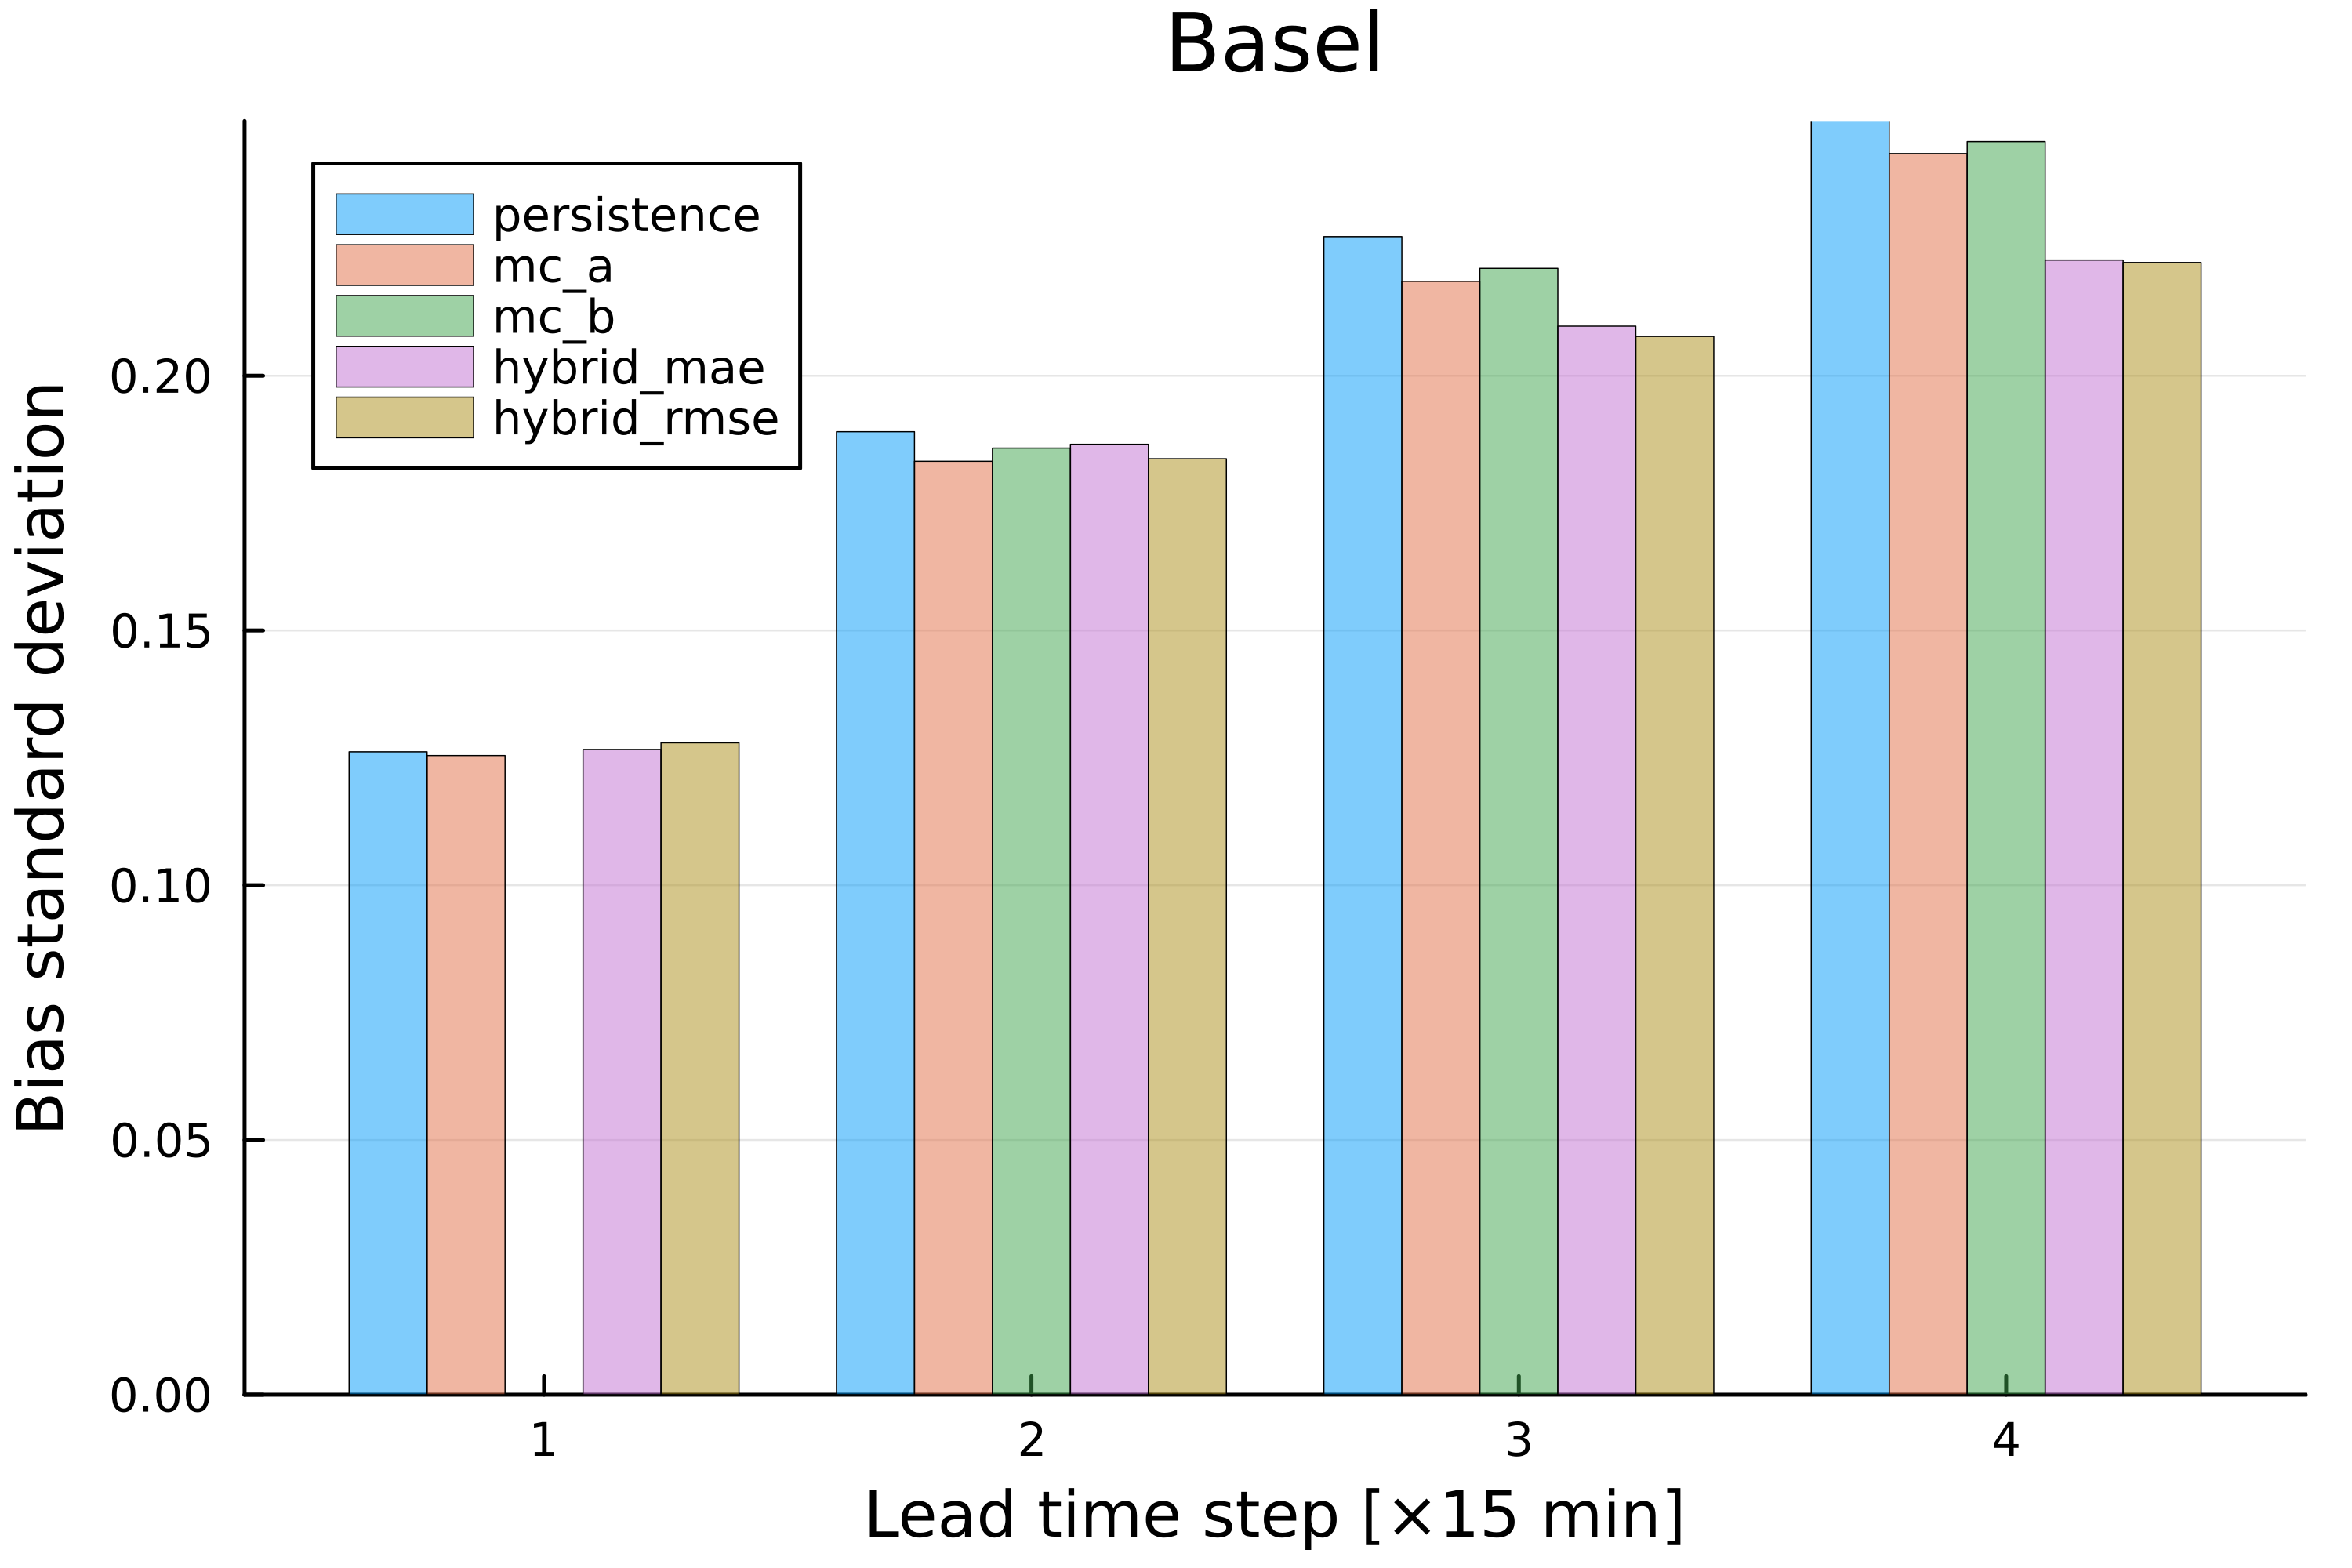

In [46]:
gb_b = groupedbar(Matrix(sds), leg=:topleft, label=["persistence" "mc_a" "mc_b" "hybrid_mae" "hybrid_rmse"],
    # c=[4 5 1 7 "black" "red"], 
    lw=0.3, fillalpha=0.5, grid=:y, 
    ylim=(0, 0.25), # ylim=(0, 0.205),
    xlabel="Lead time step [×15 min]", ylabel="Bias standard deviation", title=city)

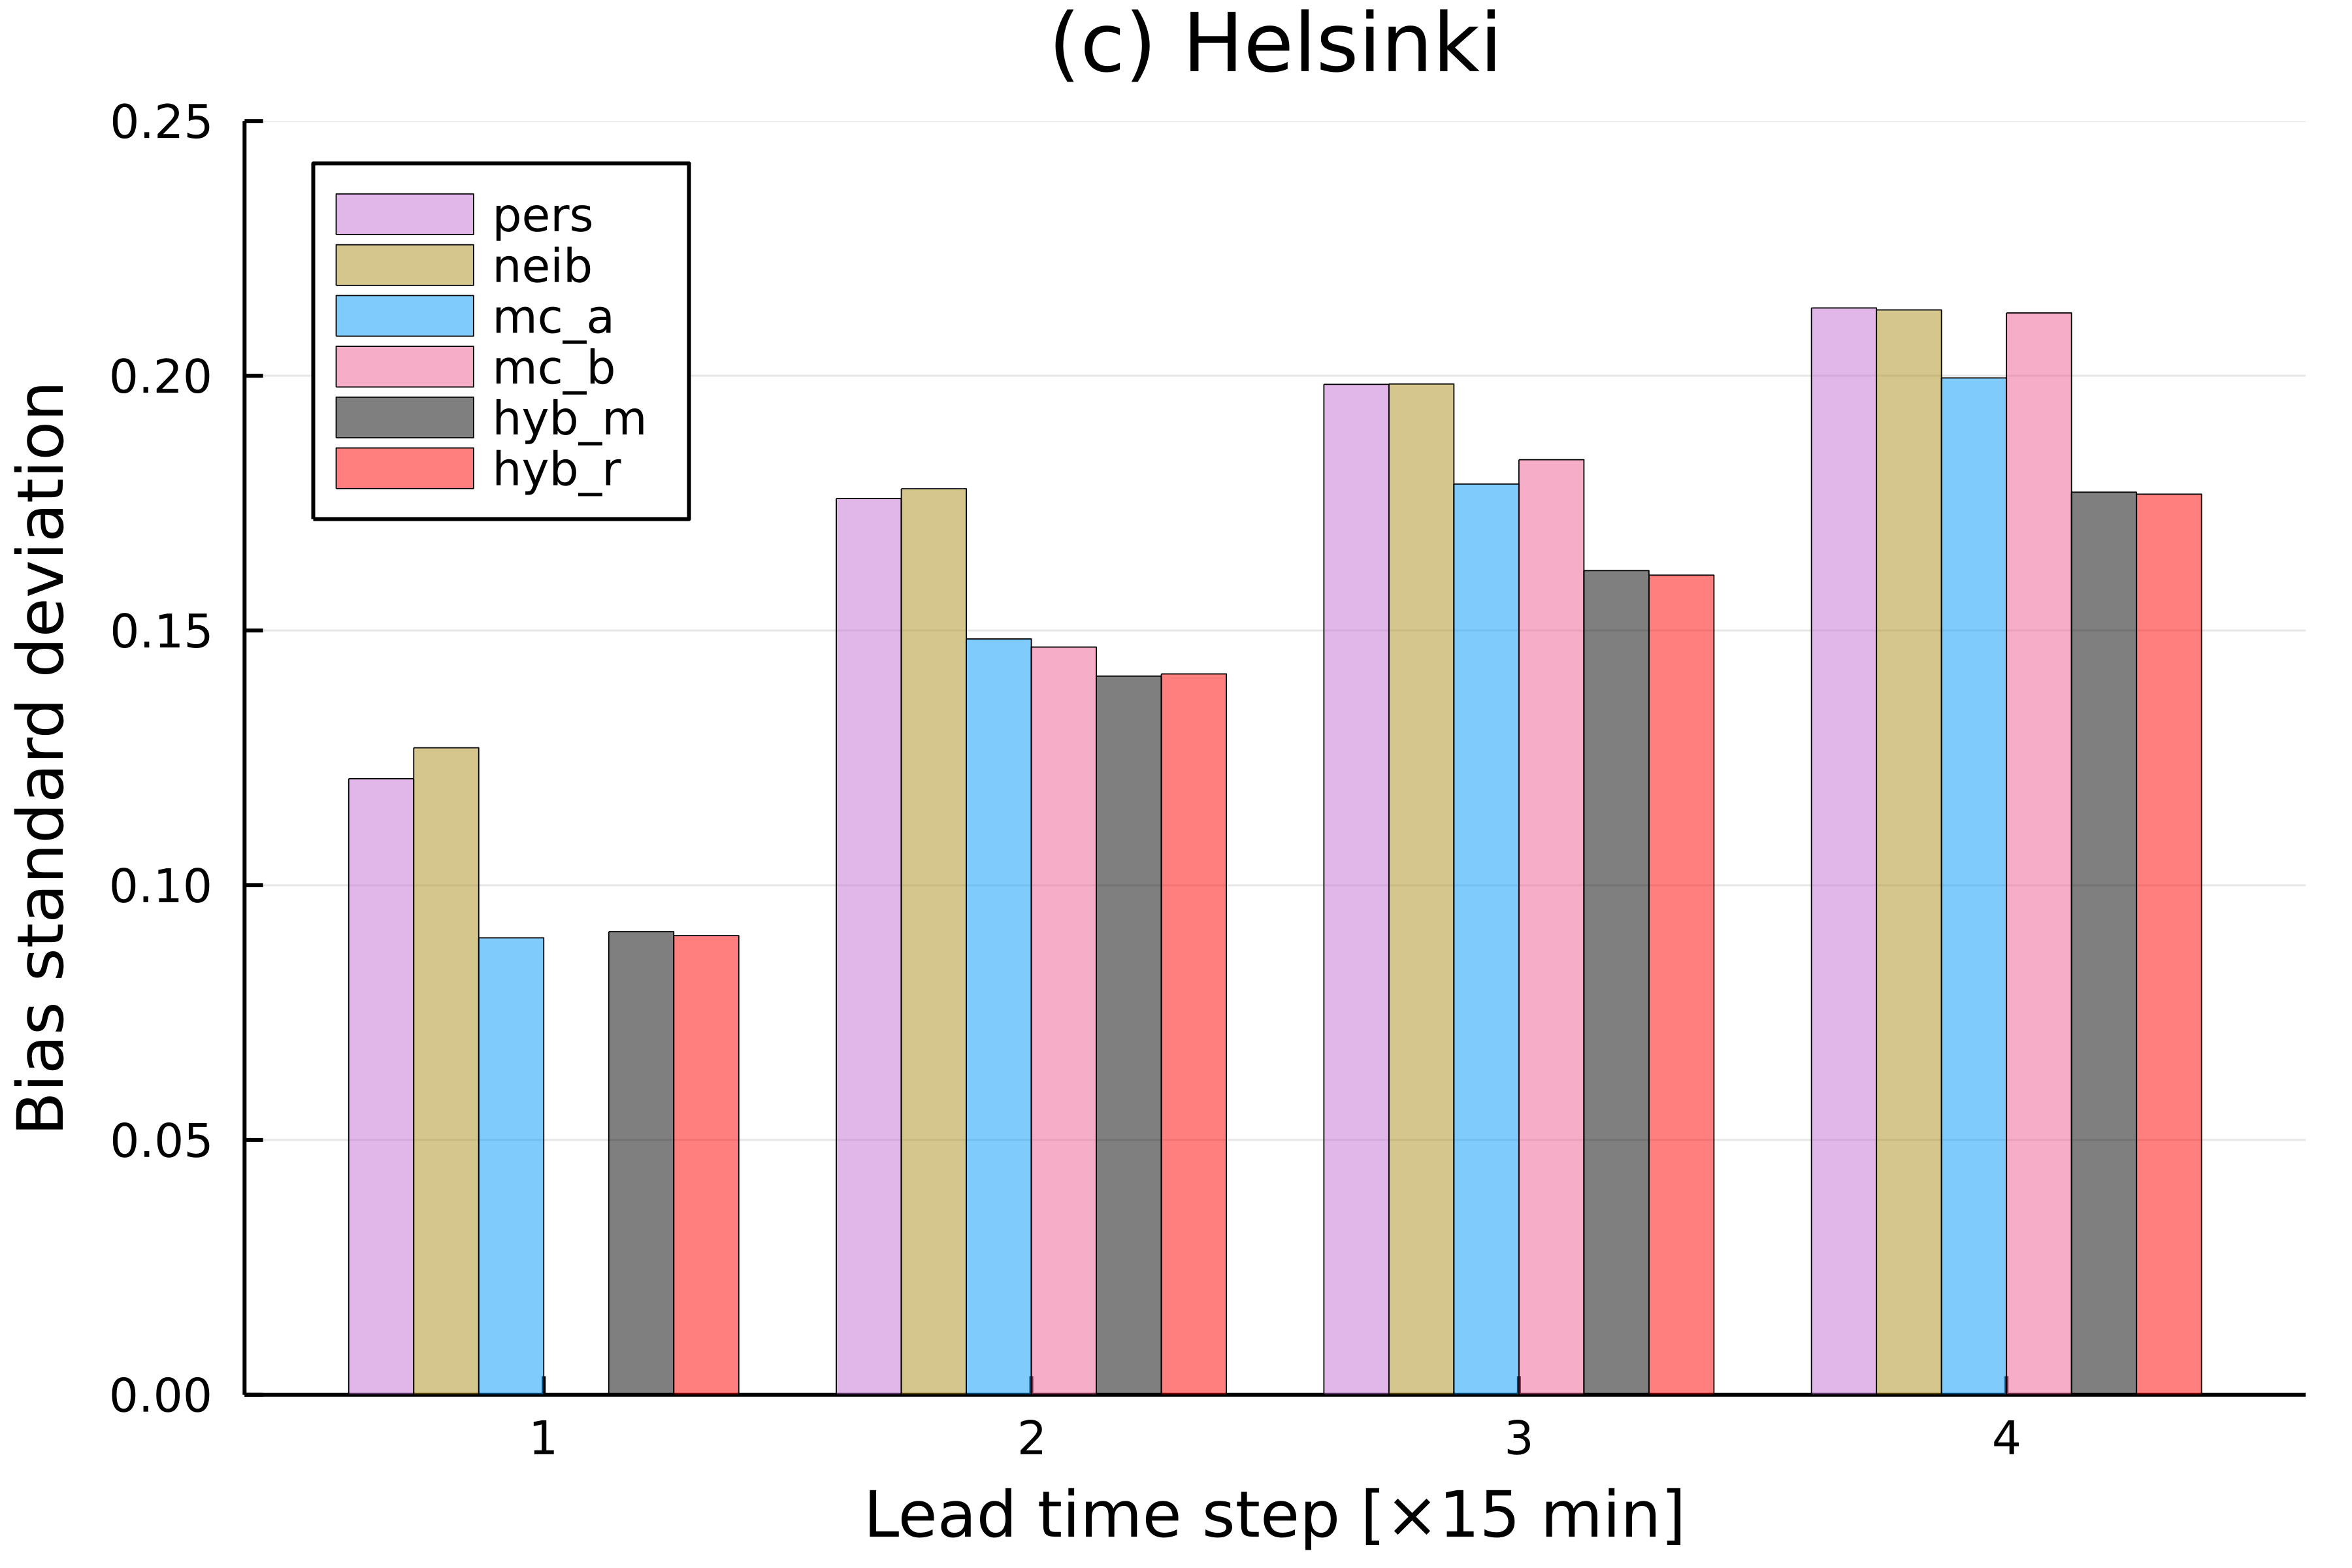

In [92]:
gb_be = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "mc_a" "mc_b" "hyb_m" "hyb_r"],
    # c=[4 5 1 7 "black" "red"], 
    lw=0.3, fillalpha=0.5, grid=:y, 
#     ylim=(0, 0.205), 
    ylim=(0, 0.25), # he
    xlabel="Lead time step [×15 min]", ylabel="Bias standard deviation", title=tit)

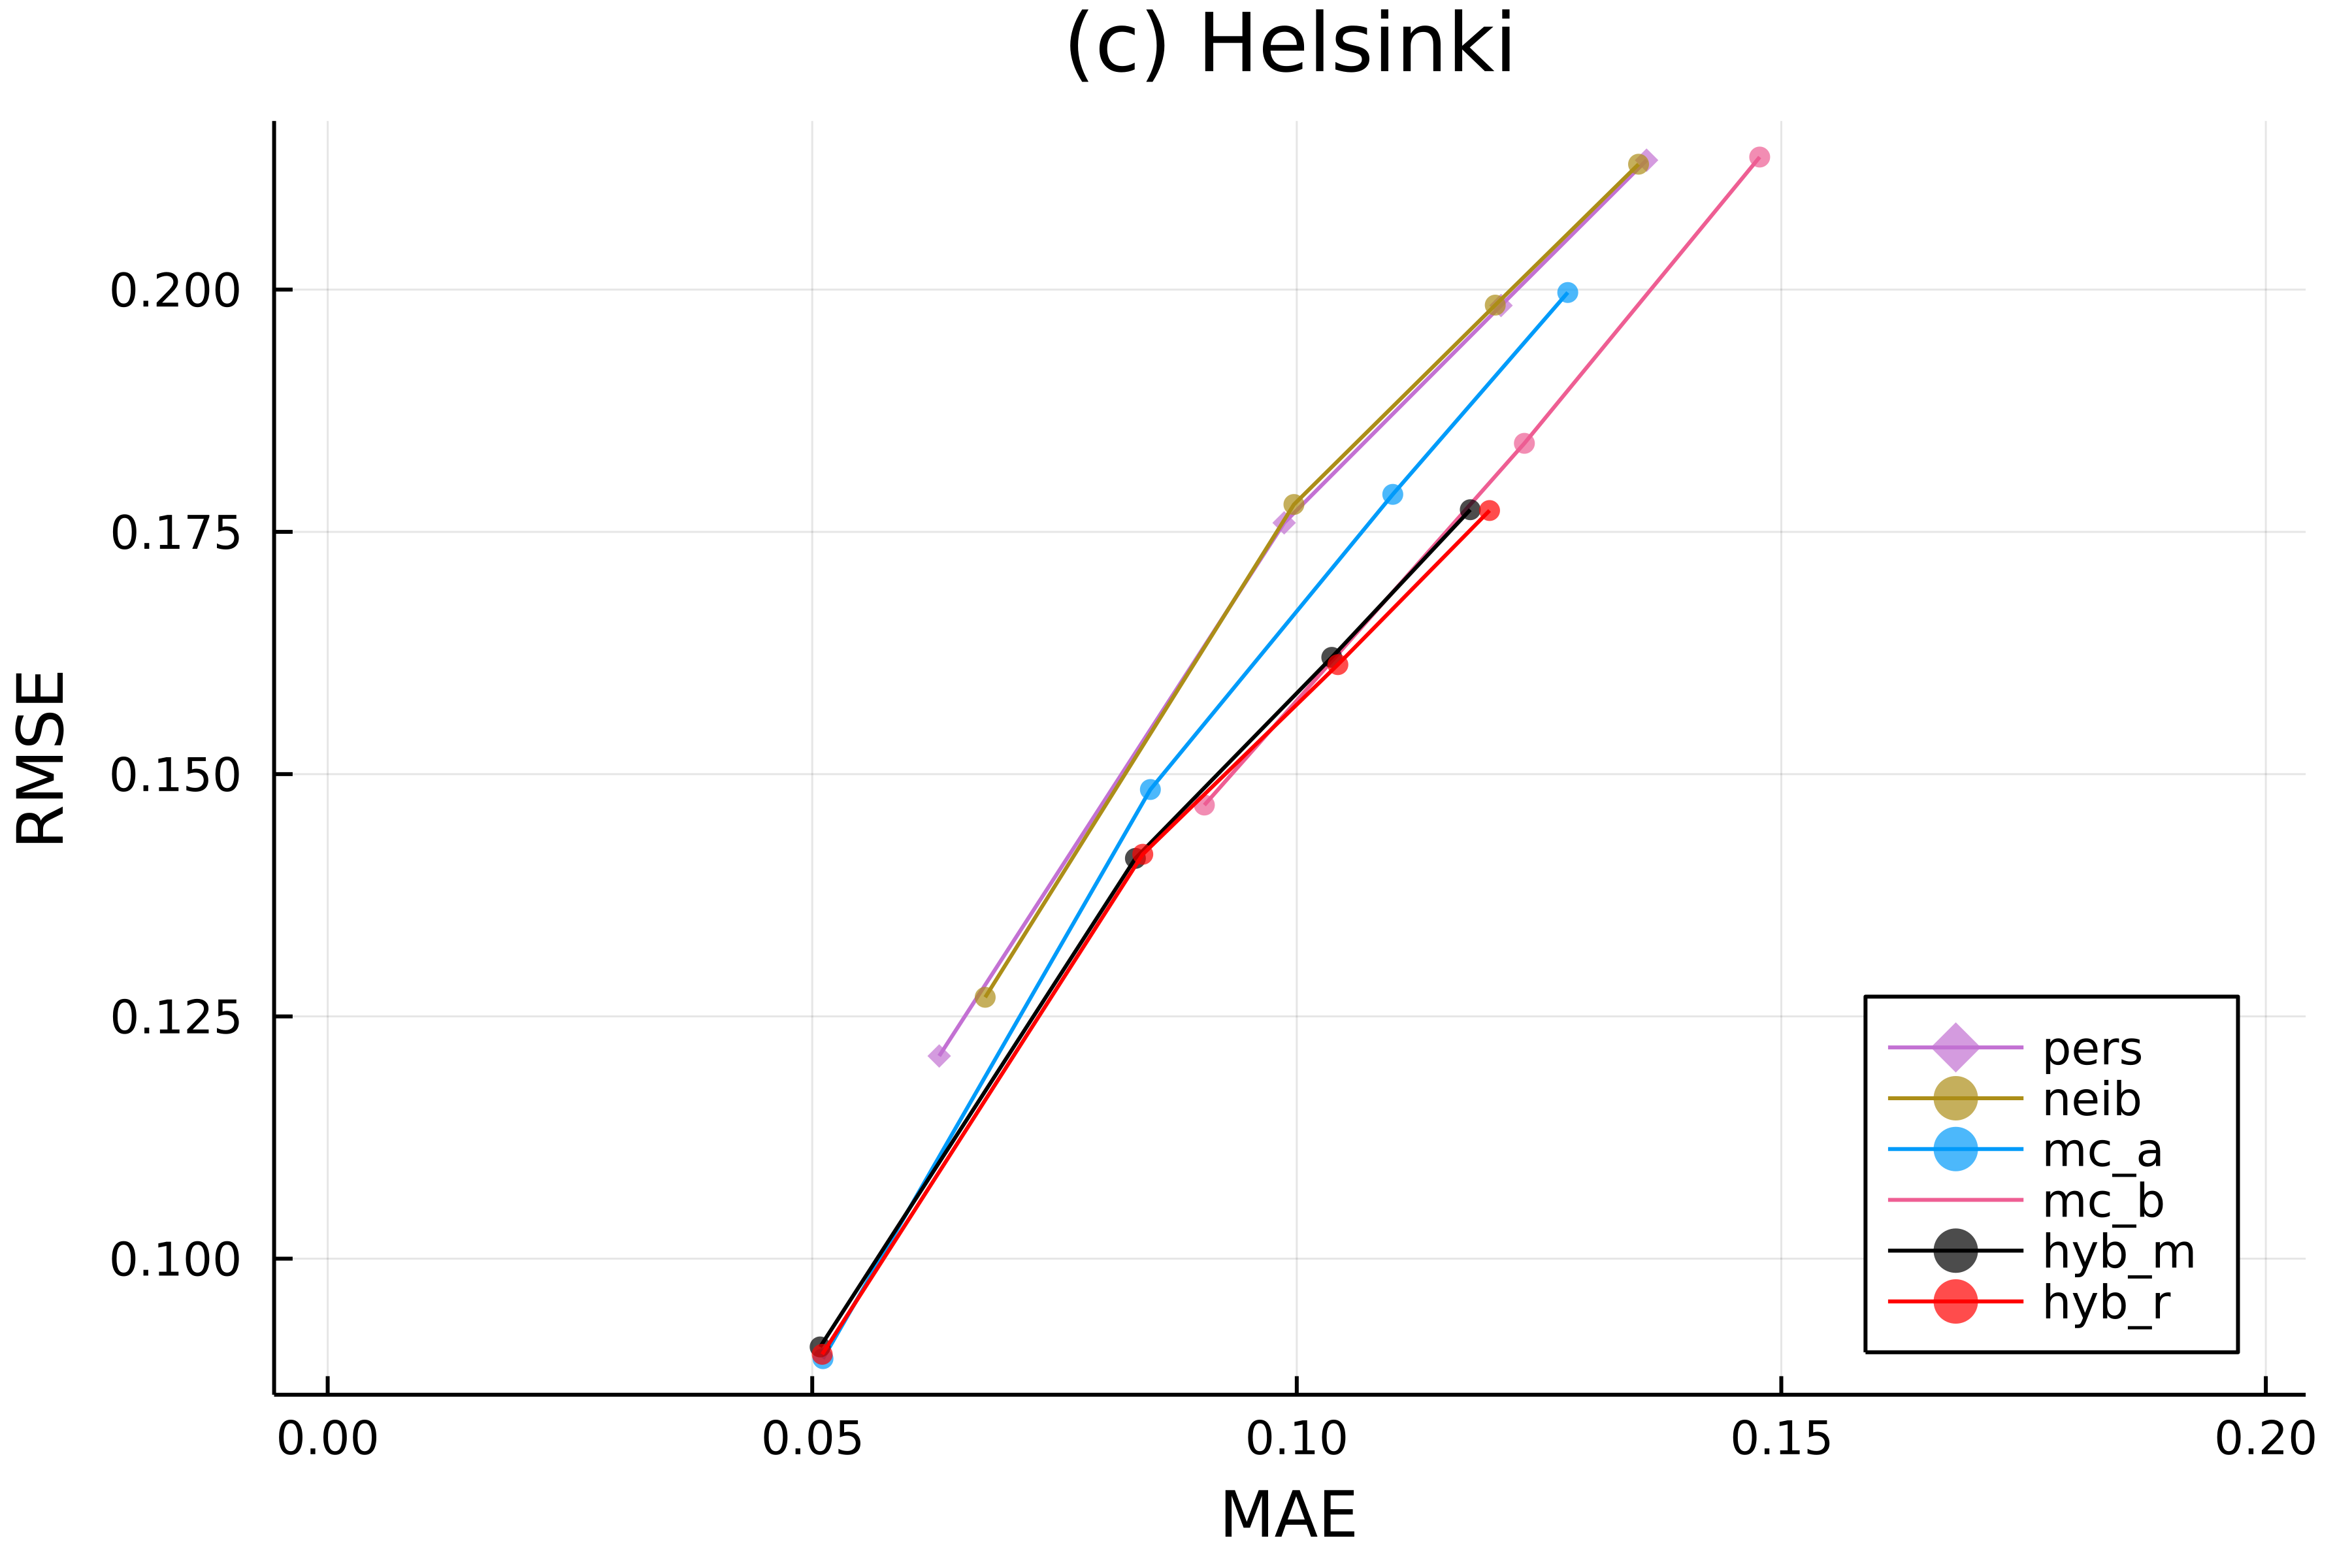

In [93]:
errs = mae_vs_rmse(df1t, df2t, df3t, df4t; tit=tit)